In [1]:
import os
import matplotlib.pyplot as plt
if os.name == "posix":
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

seed = 1234

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns

# 0. 데이터 불러오기

In [3]:
df = pd.read_csv('preprocessed_SeriesOn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29185 entries, 0 to 29184
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         29185 non-null  object 
 1   year          29185 non-null  int64  
 2   version       29185 non-null  object 
 3   type          29185 non-null  object 
 4   director      29185 non-null  object 
 5   actor         29185 non-null  object 
 6   age           29185 non-null  object 
 7   runtime       29185 non-null  int64  
 8   rating        29185 non-null  float64
 9   like          29185 non-null  int64  
 10  comment       29185 non-null  int64  
 11  isDRM         29185 non-null  object 
 12  cost          29185 non-null  int64  
 13  period        29185 non-null  object 
 14  is_action     29185 non-null  int64  
 15  is_comedy     29185 non-null  int64  
 16  is_drama      29185 non-null  int64  
 17  is_melo       29185 non-null  int64  
 18  is_horror     29185 non-nu

# 1. 특정 감독 or 배우가 포함될 경우 좋아요, 댓글 수, 평점에 유의미한 차이가 발생할 것이다.

In [5]:
df['type'].value_counts() # 무료는 제외 (그 수가 너무 적음)

type
구매    19343
대여     9812
무료       30
Name: count, dtype: int64

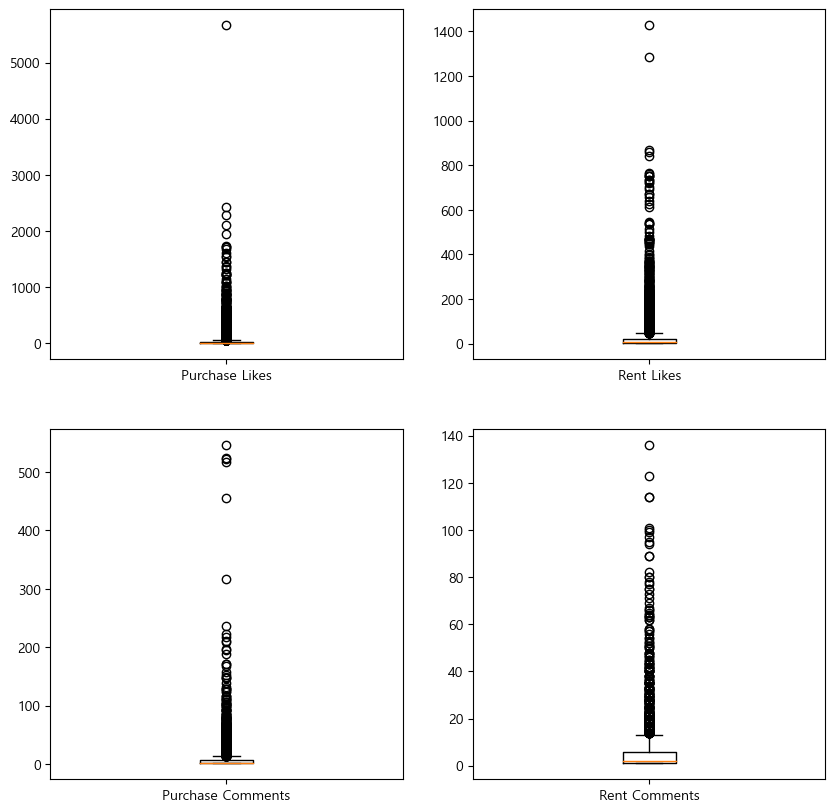

In [8]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.boxplot(df[(df['type'] == '구매') & (df['like'] > 0)]['like'].dropna(), labels=['Purchase Likes'])

plt.subplot(2, 2, 2)
plt.boxplot(df[(df['type'] == '대여') & (df['like'] > 0)]['like'].dropna(), labels=['Rent Likes'])

plt.subplot(2, 2, 3)
plt.boxplot(df[(df['type'] == '구매') & (df['comment'] > 0)]['comment'].dropna(), labels=['Purchase Comments'])

plt.subplot(2, 2, 4)
plt.boxplot(df[(df['type'] == '대여') & (df['comment'] > 0)]['comment'].dropna(), labels=['Rent Comments'])

plt.show()
# 특이값의 범위가 비교적 좁게 퍼져있는 대여를 기준으로 진행. 상위 n%의 영화에서 주로 나타나는 배우 및 감독 기준
# 대여 시 좋아요 및 코멘트 수를 분석

## 1. 상위 10 % 평점 영화 추출

In [4]:
len(df) * 0.1

2918.5

In [5]:
sorted_df = df.sort_values(by='rating', ascending=False)
sorted_df.head(10)

,title,year,version,type,director,actor,age,runtime,rating,like,...,is_action,is_comedy,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert
28156,해커스 게임,0,Null,구매,이해룡,"한경,봉소악,이원,야마시타 토모히사,요계지",15세 관람가,99,10.0,14,...,1,1,0,0,0,0,0,0,0,0
14360,"센베노,평창",0,Null,구매,Null,Null,12세 관람가,52,10.0,1,...,0,0,0,0,0,0,0,1,0,0
9844,무림팔선,0,Null,구매,맥전,"나 상,라오 바오",15세 관람가,78,10.0,1,...,1,0,1,0,0,1,0,0,0,0
22653,존 레논 리포트,0,Null,구매,제레미 프로페,"에이드리엔 C.무어,스테프 도슨,에반 조니킷,데이빗 제야스,리처드 카인드,데빈 라트...",12세 관람가,85,10.0,5,...,0,0,1,0,0,0,0,0,0,0
23943,치티드,0,Null,구매,헬레나 로렌티아,Null,19세 관람가,15,10.0,2,...,0,0,1,0,0,0,0,0,0,0
9807,무단조퇴,0,Null,구매,안소회,Null,12세 관람가,12,10.0,0,...,0,0,1,0,0,0,0,0,0,0
18399,엉망진창 장례식,0,Null,구매,조라 크리즈호브니코브,"율리아 알렉산드로바,레오니드 아크한젤스키,이고르 코레쉬코프",15세 관람가,96,10.0,8,...,0,1,0,0,0,0,0,0,0,0
4029,내나이가 어때서,0,Null,구매,한명구,"박철민,허진,오상철,유영미,나유경,안병경,이경영,이숙,김하림,김수애",12세 관람가,124,10.0,1,...,0,0,0,1,0,0,0,0,0,0
7957,로스트 인 런던,2021,Null,구매,우디 해럴슨,"우디 해럴슨,오웬 윌슨,윌리 넬슨,루이자 할랜드,데이빗 에이버리,마틴 맥캔,피터 페...",15세 관람가,108,10.0,21,...,0,1,0,0,0,0,0,0,0,0
27236,프렌치 시네마 스토리,0,Null,대여,베르트랑 타베르니에,Null,15세 관람가,200,10.0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df_top10 = sorted_df.head(2919)
df_top10

,title,year,version,type,director,actor,age,runtime,rating,like,...,is_action,is_comedy,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert
28156,해커스 게임,0,Null,구매,이해룡,"한경,봉소악,이원,야마시타 토모히사,요계지",15세 관람가,99,10.00,14,...,1,1,0,0,0,0,0,0,0,0
14360,"센베노,평창",0,Null,구매,Null,Null,12세 관람가,52,10.00,1,...,0,0,0,0,0,0,0,1,0,0
9844,무림팔선,0,Null,구매,맥전,"나 상,라오 바오",15세 관람가,78,10.00,1,...,1,0,1,0,0,1,0,0,0,0
22653,존 레논 리포트,0,Null,구매,제레미 프로페,"에이드리엔 C.무어,스테프 도슨,에반 조니킷,데이빗 제야스,리처드 카인드,데빈 라트...",12세 관람가,85,10.00,5,...,0,0,1,0,0,0,0,0,0,0
23943,치티드,0,Null,구매,헬레나 로렌티아,Null,19세 관람가,15,10.00,2,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14131,성스러운 피,1994,Null,구매,알레한드로 조도로프스키,"엑셀 조도로프스키,블랑카 게에라,가이 스톡웰,아단 조도로스키",19세 관람가,123,8.95,34,...,1,0,0,0,1,1,0,0,0,0
15582,스파이더맨: 노 웨이 홈 펀버전(패키지: 자막판+더빙판+부가영상),2022,Null,구매,존 왓츠,"톰 홀랜드,젠데이아 콜먼,베네딕트 컴버배치,존 파브로,제이콥 배덜런,마리사 토메이,...",12세 관람가,157,8.95,64,...,1,0,0,0,0,0,0,0,0,0
14540,소림축구,2002,Null,대여,주성치,"주성치,자오웨이,오맹달,황일비,막미림,전계문,진국곤,임자총",15세 관람가,112,8.95,29,...,1,1,0,0,0,0,0,0,0,0
23587,철십자 훈장,1978,Null,구매,샘 페킨파,"제임스 코번,맥시밀리안 쉘,제임스 메이슨,데이비드 워너,클라우스 로위치,바딤 글로우...",19세 관람가,132,8.95,13,...,1,0,1,0,0,0,0,0,0,0


In [8]:
# 배우 or 감독이 Null이 아닌 케이스 전처리
df_top10 = df_top10[(df_top10['director'] != 'Null') & (df_top10['actor'] != 'Null')]
len(df_top10)

2740

In [9]:
duplicate_titles = df_top10['title'].duplicated(keep=False)
duplicate_count = df_top10[duplicate_titles]['title'].nunique()
duplicate_count

784

In [10]:
df_top10 = df_top10.groupby(
    ['title', 'year', 'director', 'actor']
).agg(
    {
        'age': 'last',
        'runtime': 'last',
        'rating': 'last',
        'like': 'sum',
        'comment': 'sum',
        'isDRM': 'last',
        'cost': 'last',
        'type': 'last',
        'version': 'last',
        'period': 'last',
        'is_action': 'last',
        'is_comedy': 'last',
        'is_drama': 'last',
        'is_melo': 'last',
        'is_horror': 'last',
        'is_fantasy': 'last',
        'is_animation': 'last',
        'is_DQ': 'last',
        'is_indie': 'last',
        'is_concert': 'last',
    }
).reset_index()

In [11]:
duplicate_titles = df_top10['title'].duplicated(keep=False)
duplicate_count = df_top10[duplicate_titles]['title'].nunique()
duplicate_count

15

In [12]:
df_top10[duplicate_titles]['title'].unique()

array(['극장판 실바니안 패밀리: 프레야의 선물', '글래디에이터', '길', '러빙 빈센트', '모모', '물랑 루즈',
       '바이올렛 에버가든 - 영원과 자동 수기 인형 -', '벤허', '생츄어리2: 쿼카가 너무해', '용서받지 못한 자',
       '천녀유혼', '첫사랑', '플란다스의 개', '학교 가는 길', '해바라기'], dtype=object)

In [13]:
df_top10[df_top10['director'] == 'Null']

,title,year,director,actor,age,runtime,rating,like,comment,isDRM,...,is_action,is_comedy,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert


In [14]:
len(df_top10)

1902

In [15]:
# 먼저 비교를 위한 전체 데이터의 전처리 후 데이터 준비
df_grouped = df.groupby(
    ['title', 'year', 'director', 'actor']
).agg(
    {
        'age': 'last',
        'runtime': 'last',
        'rating': 'last',
        'like': 'sum',
        'comment': 'sum',
        'isDRM': 'last',
        'cost': 'last',
        'type': 'last',
        'version': 'last',
        'period': 'last',
        'is_action': 'last',
        'is_comedy': 'last',
        'is_drama': 'last',
        'is_melo': 'last',
        'is_horror': 'last',
        'is_fantasy': 'last',
        'is_animation': 'last',
        'is_DQ': 'last',
        'is_indie': 'last',
        'is_concert': 'last',
    }
).reset_index()

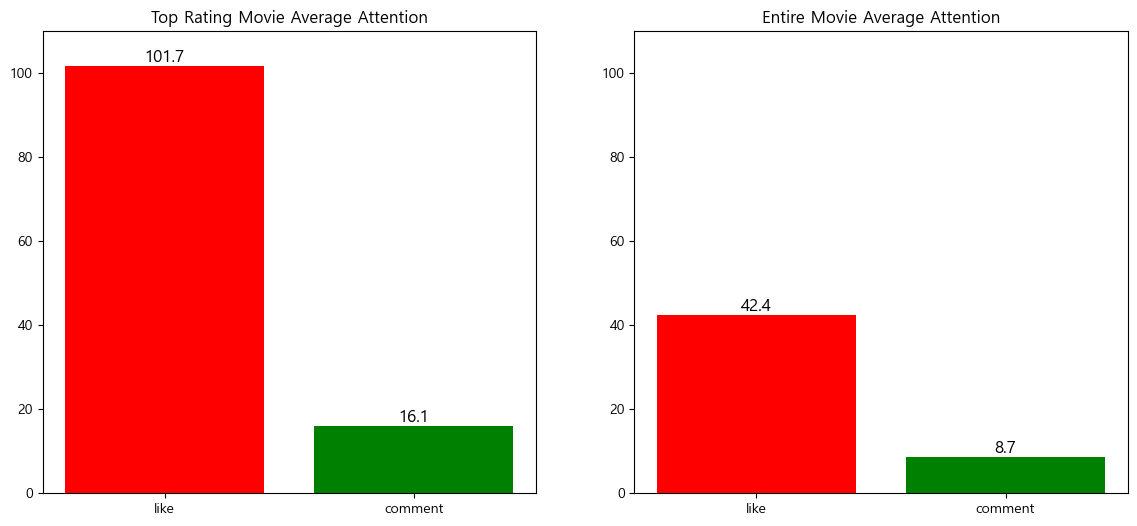

In [16]:
attention_columns = ['like', 'comment']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
top_like = df_top10[df_top10['like'] != 0]['like'].mean()
top_comment = df_top10[df_top10['comment'] != 0]['comment'].mean()
top_means = [top_like, top_comment]
bar1 = plt.bar(attention_columns, top_means, color=['red', 'green'])
plt.ylim(0, 110)
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.title('Top Rating Movie Average Attention')

plt.subplot(1, 2, 2)
_like = df_grouped[df_grouped['like'] != 0]['like'].mean()
_comment = df_grouped[df_grouped['comment'] != 0]['comment'].mean()
_means = [_like, _comment]
bar2 = plt.bar(attention_columns, _means, color=['red', 'green'])
plt.ylim(0, 110)
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.title('Entire Movie Average Attention')

plt.show()

## 3. 최다 배우, 감독

In [17]:
# Driector
directors = df_top10['director'].dropna().apply(lambda x: [name.strip() for name in x.split(',')])
directors = [name for sublist in directors for name in sublist]
len(directors)

2161

In [18]:
# Actor
actors = df_top10['actor'].dropna().apply(lambda x: [name.strip() for name in x.split(',')])
actors = [name for sublist in actors for name in sublist]
len(actors)

12499

In [19]:
# 최다 디렉터
pd.Series(directors).value_counts()

피터 잭슨        13
스티븐 스필버그     11
론 하워드         7
크리스 콜럼버스      7
미야자키 하야오      7
             ..
에른스트 루비치      1
요하네스 샤프       1
장윤주           1
믹 데이비스        1
할리나 디르스츠카     1
Name: count, Length: 1625, dtype: int64

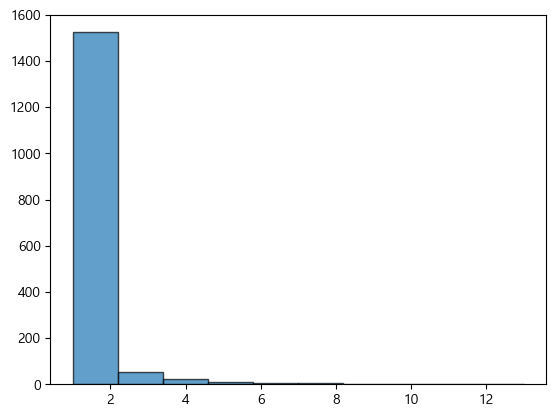

In [20]:
# 2회 이상으로 언급된 감독 기준이 적합해 보임.
plt.hist(pd.Series(directors).value_counts(), edgecolor='k', alpha=0.7)
plt.show()

In [21]:
pd.Series(directors).value_counts().head(100) # top 100으로 결정
top100_directors = pd.Series(directors).value_counts().head(100).index.tolist()
top100_directors

['피터 잭슨',
 '스티븐 스필버그',
 '론 하워드',
 '크리스 콜럼버스',
 '미야자키 하야오',
 '클린트 이스트우드',
 '해밀턴 러스크',
 '이준익',
 '김현호',
 '오우삼',
 '프란시스 포드 코폴라',
 '로버트 저메키스',
 '호소다 마모루',
 '크리스토퍼 놀란',
 '두기봉',
 '성룡',
 '오윤동',
 '클라이드 제로니미',
 '하라 케이이치',
 '장이머우',
 '울프강 라이트만',
 '정소동',
 '아베 노리유키',
 '윤제완',
 '존 머스커',
 '김성호',
 '가스 제닝스',
 '리들리 스콧',
 '켈리 애스버리',
 '장 자크 아노',
 '미츠나카 스스무',
 '유야마 쿠니히코',
 '피트 닥터',
 '딘 데블로이스',
 '브래드 버드',
 '최국희',
 '추창민',
 '존 라세터',
 '로브 라이너',
 '시노하라 토시야',
 '윤제균',
 '윌프레드 잭슨',
 '크리스 샌더스',
 '론 클레멘츠',
 '조셉 코신스키',
 '제임스 카메론',
 '쥬세페 토르나토레',
 '피터 램지',
 '머빈 르로이',
 '페니 마샬',
 '존 맥티어난',
 '리 언크리치',
 '이지원',
 '돈 블루스',
 '박흥식',
 '페데리코 펠리니',
 '강형철',
 '미즈시마 츠토무',
 '빌리 와일더',
 '왕정',
 '타나카 히로유키',
 '제임스 맨골드',
 '크리스토퍼 맥쿼리',
 '서극',
 '데이빗 린',
 '도이 노부히로',
 '마초성',
 '고희영',
 '케빈 리마',
 '비토리오 데 시카',
 '리처드 리치',
 '홍금보',
 '마틴 브레스트',
 '스파이크 브랜트',
 '폴 그린그래스',
 '브루스 베레스포드',
 '데이빗 예이츠',
 '존 카니',
 '이창동',
 '민규동',
 '이현우',
 '토코로 토모카즈',
 '김성윤',
 '팀 버튼',
 '야스히코 요시카즈',
 '윌리엄 와일러',
 '윤창섭',
 '시바사키 타카유키',
 '우민호',
 '미키 타카히로',
 '시바야마 츠토무',
 '유진위',
 '오성윤',
 '셀

In [22]:
# 최다 배우
pd.Series(actors).value_counts()

유덕화        17
톰 행크스      17
숀 애스틴      15
비고 모텐슨     15
일라이저 우드    14
           ..
코트니 포드      1
닉 레딩        1
데니스 퀼러리     1
정패          1
율리아 포스      1
Name: count, Length: 8513, dtype: int64

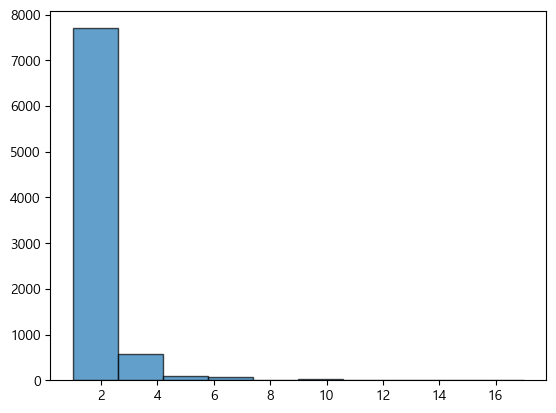

In [23]:
# 4번을 초과하여 언급되는 배우들을 기준으로 진행
plt.hist(pd.Series(actors).value_counts(), edgecolor='k', alpha=0.7)
plt.show()

In [24]:
pd.Series(actors).value_counts().head(200) # Top 200으로 결정
top200_actors = pd.Series(actors).value_counts().head(200).index.tolist()
top200_actors

['유덕화',
 '톰 행크스',
 '숀 애스틴',
 '비고 모텐슨',
 '일라이저 우드',
 '리브 타일러',
 '엄상현',
 '톰 크루즈',
 '존 라이스-데이비스',
 '신용우',
 '정미숙',
 '성룡',
 '유해진',
 '케이트 블란쳇',
 '로빈 윌리엄스',
 '빌리 보이드',
 '이안 맥켈런',
 '장국영',
 '니콜라스 케이지',
 '이병헌',
 '게리 올드만',
 '오달수',
 '김서영',
 '이경영',
 '코오로기 사토미',
 '김환진',
 '홍소영',
 '사무엘 L. 잭슨',
 '주윤발',
 '이선',
 '모건 프리먼',
 '짐 커밍스',
 '맷 데이먼',
 '홍금보',
 '야지마 아키코',
 '나라하시 미키',
 '후지와라 케이지',
 '이치류사이 테이유',
 '양조위',
 '우마',
 '올랜도 블룸',
 '에드 해리스',
 '로버트 드 니로',
 '오맹달',
 '조 샐다나',
 '황정민',
 '홍범기',
 '도미닉 모나한',
 '박철민',
 '관지림',
 '마시바 마리',
 '김향기',
 '이미자',
 '김현지',
 '존 라첸버거',
 '하정우',
 '증지위',
 '정인기',
 '브렌단 글리슨',
 '안성기',
 '존 허트',
 '엠마 왓슨',
 '하야시 타마오',
 '박정민',
 '사토 치에',
 '야마구치 캇페이',
 '유청운',
 '전태열',
 '해리슨 포드',
 '양정화',
 '헬레나 본햄 카터',
 '스칼렛 요한슨',
 '매튜 맥커너히',
 '앨런 릭먼',
 '송영창',
 '김태훈',
 '알 파치노',
 '제니퍼 코넬리',
 '캐서린 키너',
 '장영남',
 '주드 로',
 '나문희',
 '안내상',
 '카키하라 테츠야',
 '남도형',
 '나카이 카즈야',
 '조재윤',
 '성규안',
 '리암 니슨',
 '김새해',
 '임달화',
 '휴 잭맨',
 '크리스토퍼 월켄',
 '장만옥',
 '토마스 크레취만',
 '알렉 볼드윈',
 '레베카 퍼거슨',
 '호소야 요시마사',
 '리즈 위더스푼',
 '알란 터딕',
 '이장원',
 '마

## 3. Top100 감독들의 평균 좋아요 및 코멘트 수 확인

In [25]:
top100_director_df = df[df['director'].apply(lambda x: any(director in [name.strip() for name in x.split(',')] for director in top100_directors))]
top100_director_df[top100_director_df['director'] == '피터 잭슨']

,title,year,version,type,director,actor,age,runtime,rating,like,...,is_action,is_comedy,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert
7383,러블리 본즈,2010,Null,구매,피터 잭슨,"마크 월버그,레이첼 와이즈,시얼샤 로넌,수잔 서랜든,스탠리 투치,아만다 미칼카,마이...",15세 관람가,135,6.81,17,...,1,0,1,0,0,1,0,0,0,0
7384,러블리 본즈,2010,Null,대여,피터 잭슨,"마크 월버그,레이첼 와이즈,시얼샤 로넌,수잔 서랜든,스탠리 투치,아만다 미칼카,마이...",15세 관람가,135,6.81,24,...,1,0,1,0,0,1,0,0,0,0
10834,반지의 제왕 - 반지 원정대(FHD),2001,Null,구매,피터 잭슨,"일라이저 우드,이안 맥켈런,리브 타일러,비고 모텐슨,숀 애스틴,케이트 블란쳇,존 라...",12세 관람가,178,9.31,22,...,1,0,0,0,0,1,0,0,0,0
10835,반지의 제왕 - 반지 원정대(FHD),2001,Null,대여,피터 잭슨,"일라이저 우드,이안 맥켈런,리브 타일러,비고 모텐슨,숀 애스틴,케이트 블란쳇,존 라...",12세 관람가,178,9.31,58,...,1,0,0,0,0,1,0,0,0,0
10836,반지의 제왕 - 반지 원정대(HD),2001,Null,구매,피터 잭슨,"일라이저 우드,이안 맥켈런,리브 타일러,비고 모텐슨,숀 애스틴,케이트 블란쳇,존 라...",12세 관람가,178,9.31,28,...,1,0,0,0,0,1,0,0,0,0
10837,반지의 제왕 - 반지 원정대(HD),2001,Null,대여,피터 잭슨,"일라이저 우드,이안 맥켈런,리브 타일러,비고 모텐슨,숀 애스틴,케이트 블란쳇,존 라...",12세 관람가,178,9.31,42,...,1,0,0,0,0,1,0,0,0,0
10838,반지의 제왕 - 반지 원정대_(확장판)(확장판 FHD),2001,Null,구매,피터 잭슨,"일라이저 우드,이안 맥켈런,리브 타일러,비고 모텐슨,숀 애스틴,케이트 블란쳇,존 라...",12세 관람가,228,9.31,109,...,1,0,0,0,0,1,0,0,0,0
10839,반지의 제왕 - 반지 원정대_(확장판)(확장판 HD),2001,Null,구매,피터 잭슨,"일라이저 우드,이안 맥켈런,리브 타일러,비고 모텐슨,숀 애스틴,케이트 블란쳇,존 라...",12세 관람가,228,9.31,59,...,1,0,0,0,0,1,0,0,0,0
10840,반지의 제왕 2 - 두 개의 탑(FHD),2002,Null,구매,피터 잭슨,"일라이저 우드,이안 맥켈런,비고 모텐슨,리브 타일러,숀 애스틴,케이트 블란쳇,존 라...",12세 관람가,179,9.35,8,...,1,0,0,0,0,1,0,0,0,0
10841,반지의 제왕 2 - 두 개의 탑(FHD),2002,Null,대여,피터 잭슨,"일라이저 우드,이안 맥켈런,비고 모텐슨,리브 타일러,숀 애스틴,케이트 블란쳇,존 라...",12세 관람가,179,9.35,34,...,1,0,0,0,0,1,0,0,0,0


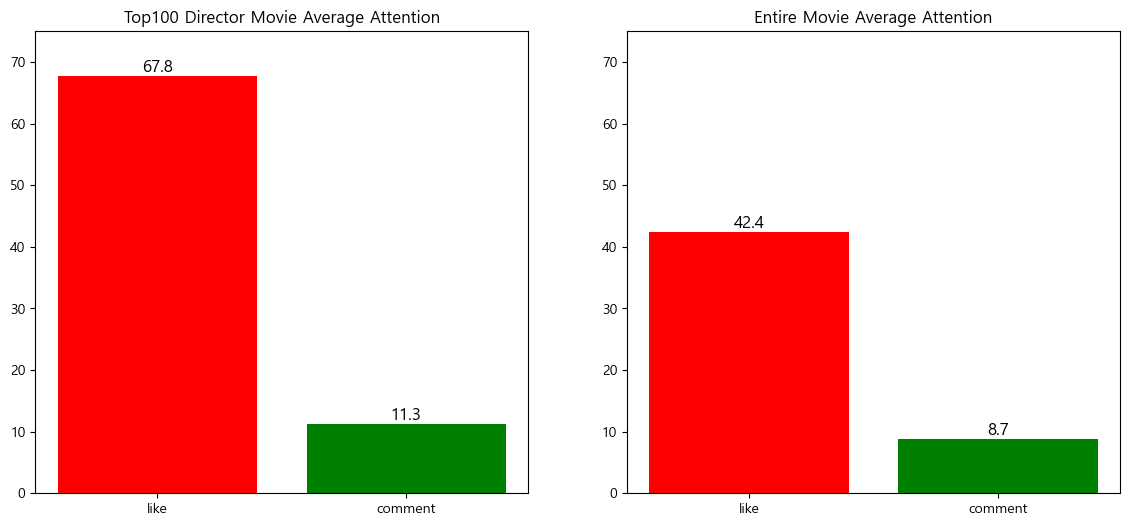

In [26]:
attention_columns = ['like', 'comment']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
top_like = top100_director_df[top100_director_df['like'] != 0]['like'].mean()
top_comment = top100_director_df[top100_director_df['comment'] != 0]['comment'].mean()
top_means = [top_like, top_comment]
bar1 = plt.bar(attention_columns, top_means, color=['red', 'green'])
plt.ylim(0, 75)
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.title('Top100 Director Movie Average Attention')

plt.subplot(1, 2, 2)
_like = df_grouped[df_grouped['like'] != 0]['like'].mean()
_comment = df_grouped[df_grouped['comment'] != 0]['comment'].mean()
_means = [_like, _comment]
bar2 = plt.bar(attention_columns, _means, color=['red', 'green'])
plt.ylim(0, 75)
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.title('Entire Movie Average Attention')

plt.show()

## 4. Top200 배우들의 평균 좋아요 및 코멘트 수 확인

In [27]:
top200_actor_df = df[df['actor'].apply(lambda x: any(actor in [name.strip() for name in x.split(',')] for actor in top200_actors))]
top200_actor_df.head()

,title,year,version,type,director,actor,age,runtime,rating,like,...,is_action,is_comedy,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert
2,...ing,2003,Null,구매,이언희,"임수정,김래원,이미숙,최덕문,이성경,김지영,윤덕현,이유정",12세 관람가,103,8.89,9,...,0,0,0,1,0,0,0,0,0,0
3,...ing,2003,Null,대여,이언희,"임수정,김래원,이미숙,최덕문,이성경,김지영,윤덕현,이유정",12세 관람가,103,8.89,4,...,0,0,0,1,0,0,0,0,0,0
6,007 북경특급,0,Null,대여,"이력지,주성치","주성치,원영의,진보련,이건인,이력지,황금강,나가영,정조,황일비,등조존",15세 관람가,82,8.51,13,...,0,1,0,0,0,0,0,0,0,0
12,09월 11일,2018,Null,구매,마틴 귀귀,"찰리 쉰,우피 골드버그,지나 거손,루이스 구즈만,우드 해리스,올가 폰다,재클린 비셋...",15세 관람가,88,7.31,1,...,1,0,1,0,0,0,0,0,0,0
15,10 미니츠 곤,2019,Null,구매,브라이언 A 밀러,"브루스 윌리스,마이클 치클리스",15세 관람가,95,3.58,3,...,1,0,0,0,0,0,0,0,0,0


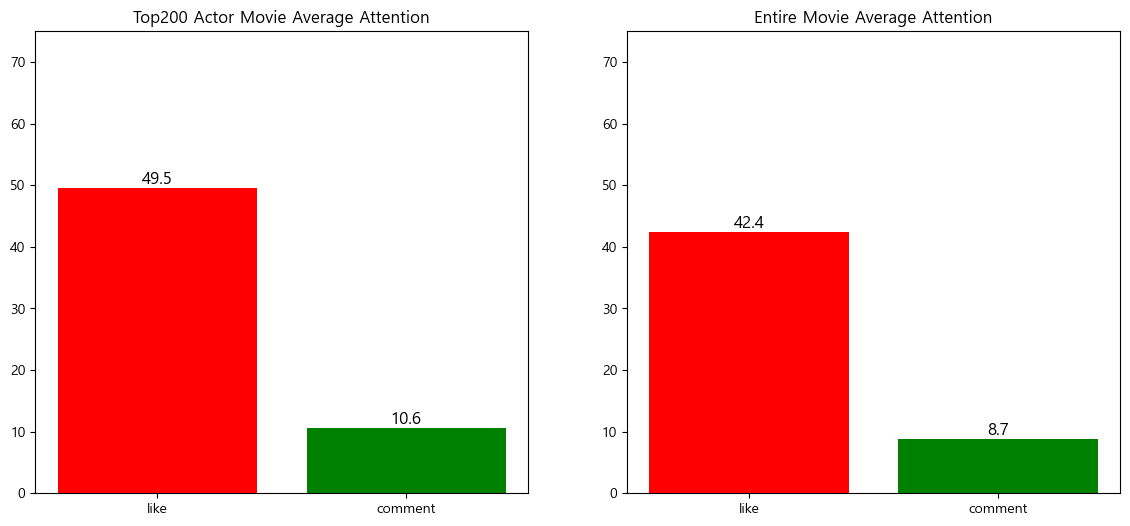

In [28]:
attention_columns = ['like', 'comment']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
top_like = top200_actor_df[top200_actor_df['like'] != 0]['like'].mean()
top_comment = top200_actor_df[top200_actor_df['comment'] != 0]['comment'].mean()
top_means = [top_like, top_comment]
bar1 = plt.bar(attention_columns, top_means, color=['red', 'green'])
plt.ylim(0, 75)
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.title('Top200 Actor Movie Average Attention')

plt.subplot(1, 2, 2)
bar2 = plt.bar(attention_columns, _means, color=['red', 'green'])
plt.ylim(0, 75)
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.title('Entire Movie Average Attention')

plt.show()

# 2. 매니아 층이 나뉠 수 있는 장르의 경우 평점에 영향이 있을 것이다.

## 1. 가정
### 1) 호러 : 호러의 경우 공포나 긴장감을 유발하기에 특정 관객층에게 인기가 있을 것이다.
### 2) SF/판타지 : 이 장르의 경우 현실과는 다른 특정 세계관을 지니고 있는 영화거나, 상상적인 요소가 많이 들어가기에 이를 이해하고 즐기는 것에 있어 매니아 층이 있을 것이다.
### 3) 애니메이션 : 이미 '애니덕후', '오타쿠' 등으로 별칭이 있는 장르인 만큼 매니아 층이 있을 것이다.
### 4) 다큐멘터리 : 대중적인 오락 영화와는 거리가 멀고 특정 주제를 깊게 다루는 경우가 많기에 매니아 층이 있을 것이다.
### 5) 콘서트 : 이 장르의 경우 특정 아티스트나 밴드 등의 공연을 담고 있기에 해당 팬들에게 인기가 있을 것으로 보여짐.

In [31]:
action = df[df['is_action'] == 1]
animation = df[df['is_animation'] == 1]
comedy = df[df['is_comedy'] == 1]
concert = df[df['is_concert'] == 1]
DQ = df[df['is_DQ'] == 1]
drama = df[df['is_drama'] == 1]
fantasy = df[df['is_fantasy'] == 1]
horror = df[df['is_horror'] == 1]
indie = df[df['is_indie'] == 1]
melo = df[df['is_melo'] == 1]

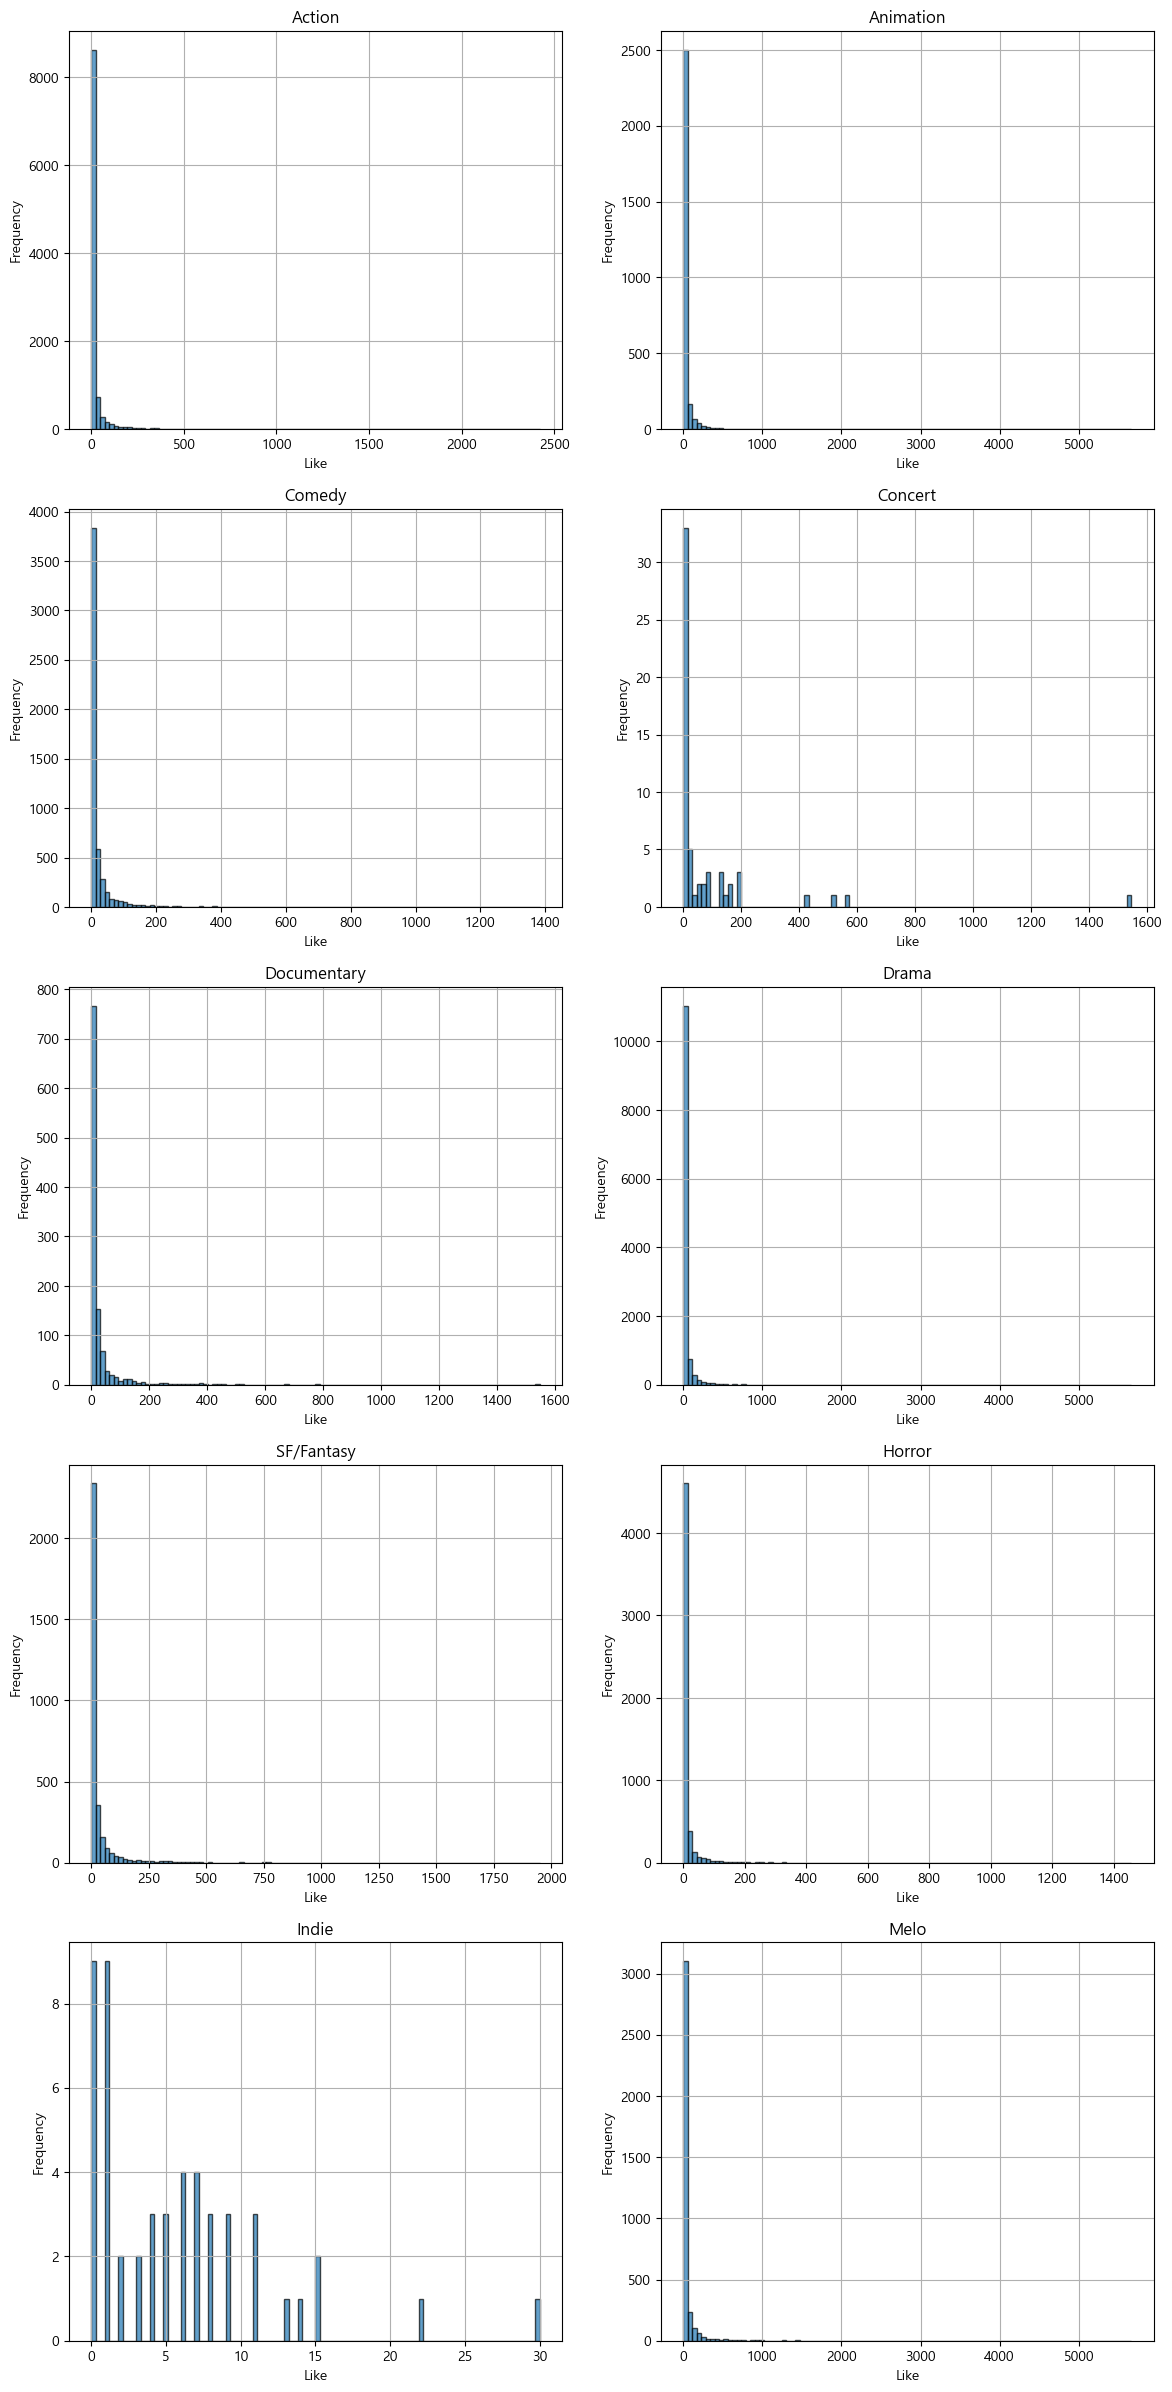

In [32]:
# histogram
plt.figure(figsize=(14, 30))

plt.subplot(5, 2, 1)
plt.hist(action['like'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Action')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 2)
plt.hist(animation['like'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Animation')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 3)
plt.hist(comedy['like'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Comedy')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 4)
plt.hist(concert['like'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Concert')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 5)
plt.hist(DQ['like'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Documentary')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 6)
plt.hist(drama['like'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Drama')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 7)
plt.hist(fantasy['like'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('SF/Fantasy')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 8)
plt.hist(horror['like'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Horror')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 9)
plt.hist(indie['like'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Indie')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 10)
plt.hist(melo['like'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Melo')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

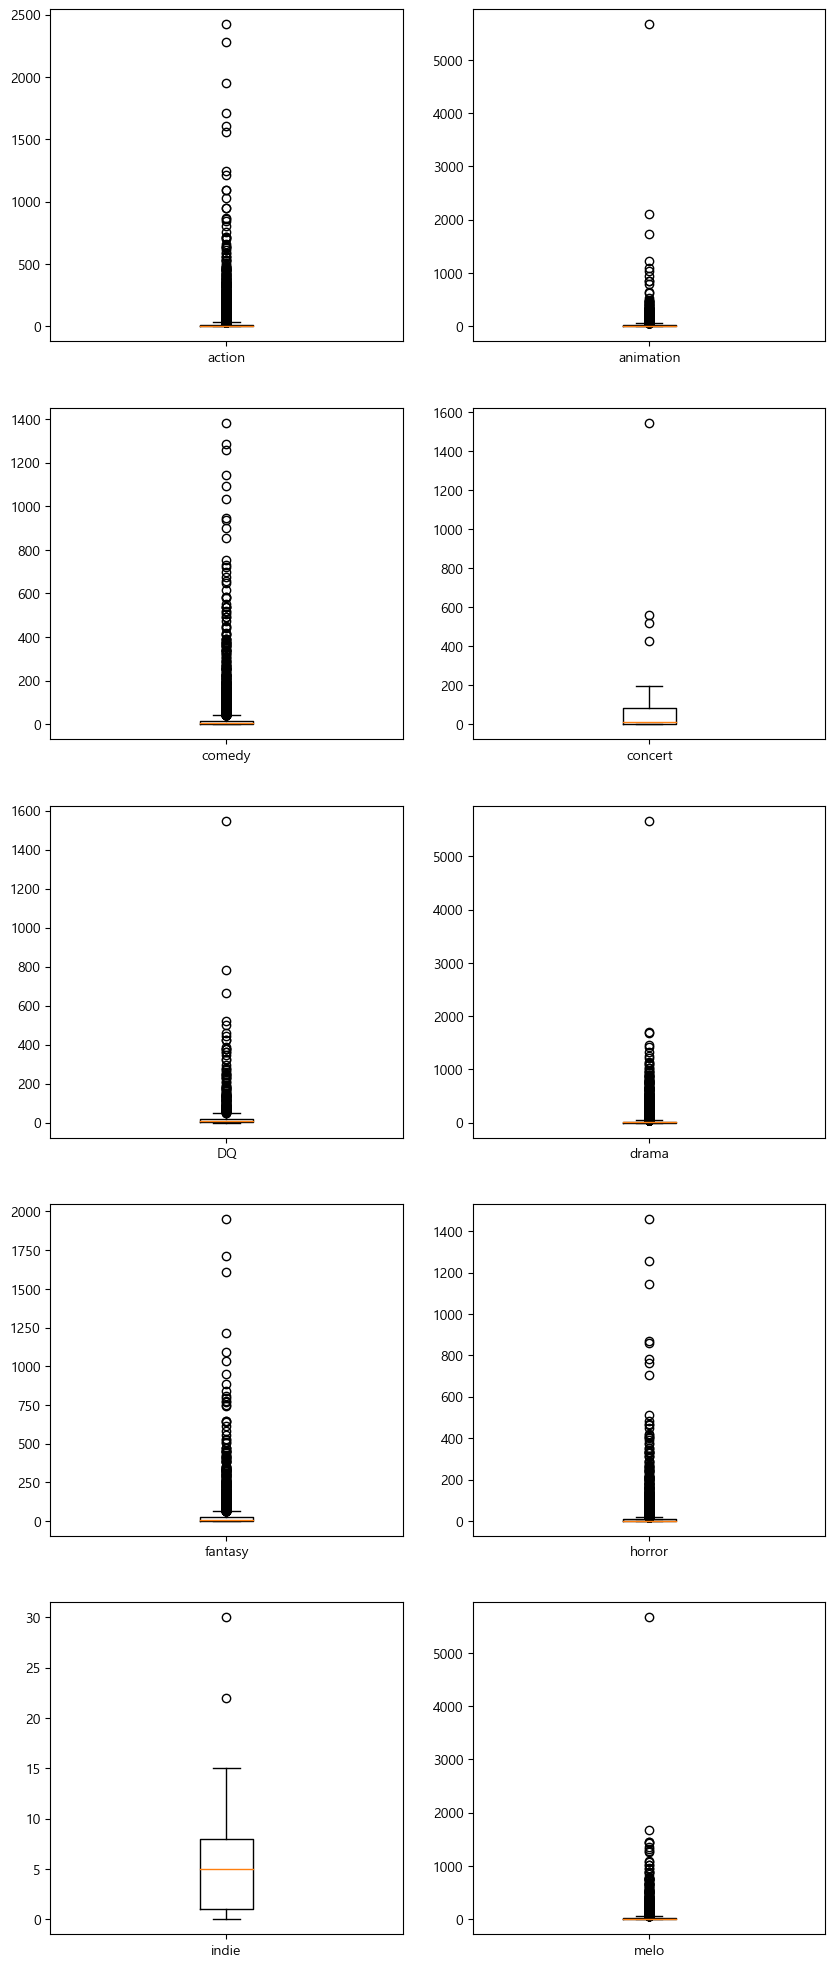

In [33]:
plt.figure(figsize=(10, 25))

plt.subplot(5, 2, 1)
plt.boxplot(action['like'].dropna(), labels=['action'])

plt.subplot(5, 2, 2)
plt.boxplot(animation['like'].dropna(), labels=['animation'])

plt.subplot(5, 2, 3)
plt.boxplot(comedy['like'].dropna(), labels=['comedy'])

plt.subplot(5, 2, 4)
plt.boxplot(concert['like'].dropna(), labels=['concert'])

plt.subplot(5, 2, 5)
plt.boxplot(DQ['like'].dropna(), labels=['DQ'])

plt.subplot(5, 2, 6)
plt.boxplot(drama['like'].dropna(), labels=['drama'])

plt.subplot(5, 2, 7)
plt.boxplot(fantasy['like'].dropna(), labels=['fantasy'])

plt.subplot(5, 2, 8)
plt.boxplot(horror['like'].dropna(), labels=['horror'])

plt.subplot(5, 2, 9)
plt.boxplot(indie['like'].dropna(), labels=['indie'])

plt.subplot(5, 2, 10)
plt.boxplot(melo['like'].dropna(), labels=['melo'])

plt.show()

In [34]:
print(f"whole like mean : {int(df['like'].mean())}")
print(f"action's like mean : {int(action['like'].mean())}")
print(f"animation's like mean : {int(animation['like'].mean())}")
print(f"comedy's like mean : {int(comedy['like'].mean())}")
print(f"concert's like mean : {int(concert['like'].mean())}")
print(f"DQ's like mean : {int(DQ['like'].mean())}")
print(f"drama's like mean : {int(drama['like'].mean())}")
print(f"fantasy's like mean : {int(fantasy['like'].mean())}")
print(f"horror's like mean : {int(horror['like'].mean())}")
print(f"indie's like mean : {int(indie['like'].mean())}")
print(f"melo's like mean : {int(melo['like'].mean())}")
# 좋아요 수의 경우, 콘서트 - 멜로 - SF/판타지 - 애니메이션 - 드라마 - ... 순으로 높음
# 독립영화, 호러, 액션의 경우 평균보다 못미치는 좋아요 수를 보여줌
# 하지만 각 영화 별 데이터 수의 차이와, 이에 따른 좋아요 수가 없는 경우의 비율의 차이가 크기에 0인 경우를 제외 후 시각화

whole like mean : 24
action's like mean : 20
animation's like mean : 31
comedy's like mean : 24
concert's like mean : 90
DQ's like mean : 29
drama's like mean : 30
fantasy's like mean : 33
horror's like mean : 13
indie's like mean : 5
melo's like mean : 41


In [35]:
max(df['like'])

5666

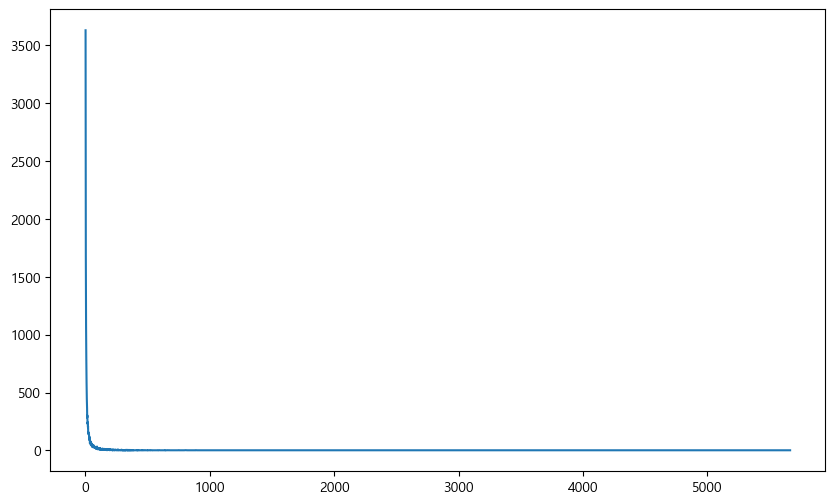

In [36]:
plt.figure(figsize=(10, 6))
all_counts = df[df['like'] > 0]['like'].value_counts().sort_index()
plt.plot(all_counts.index, all_counts.values)
plt.show()

## 2. 평점 분포

In [37]:
action = df[df['is_action'] == 1]
animation = df[df['is_animation'] == 1]
comedy = df[df['is_comedy'] == 1]
concert = df[df['is_concert'] == 1]
DQ = df[df['is_DQ'] == 1]
drama = df[df['is_drama'] == 1]
fantasy = df[df['is_fantasy'] == 1]
horror = df[df['is_horror'] == 1]
indie = df[df['is_indie'] == 1]
melo = df[df['is_melo'] == 1]

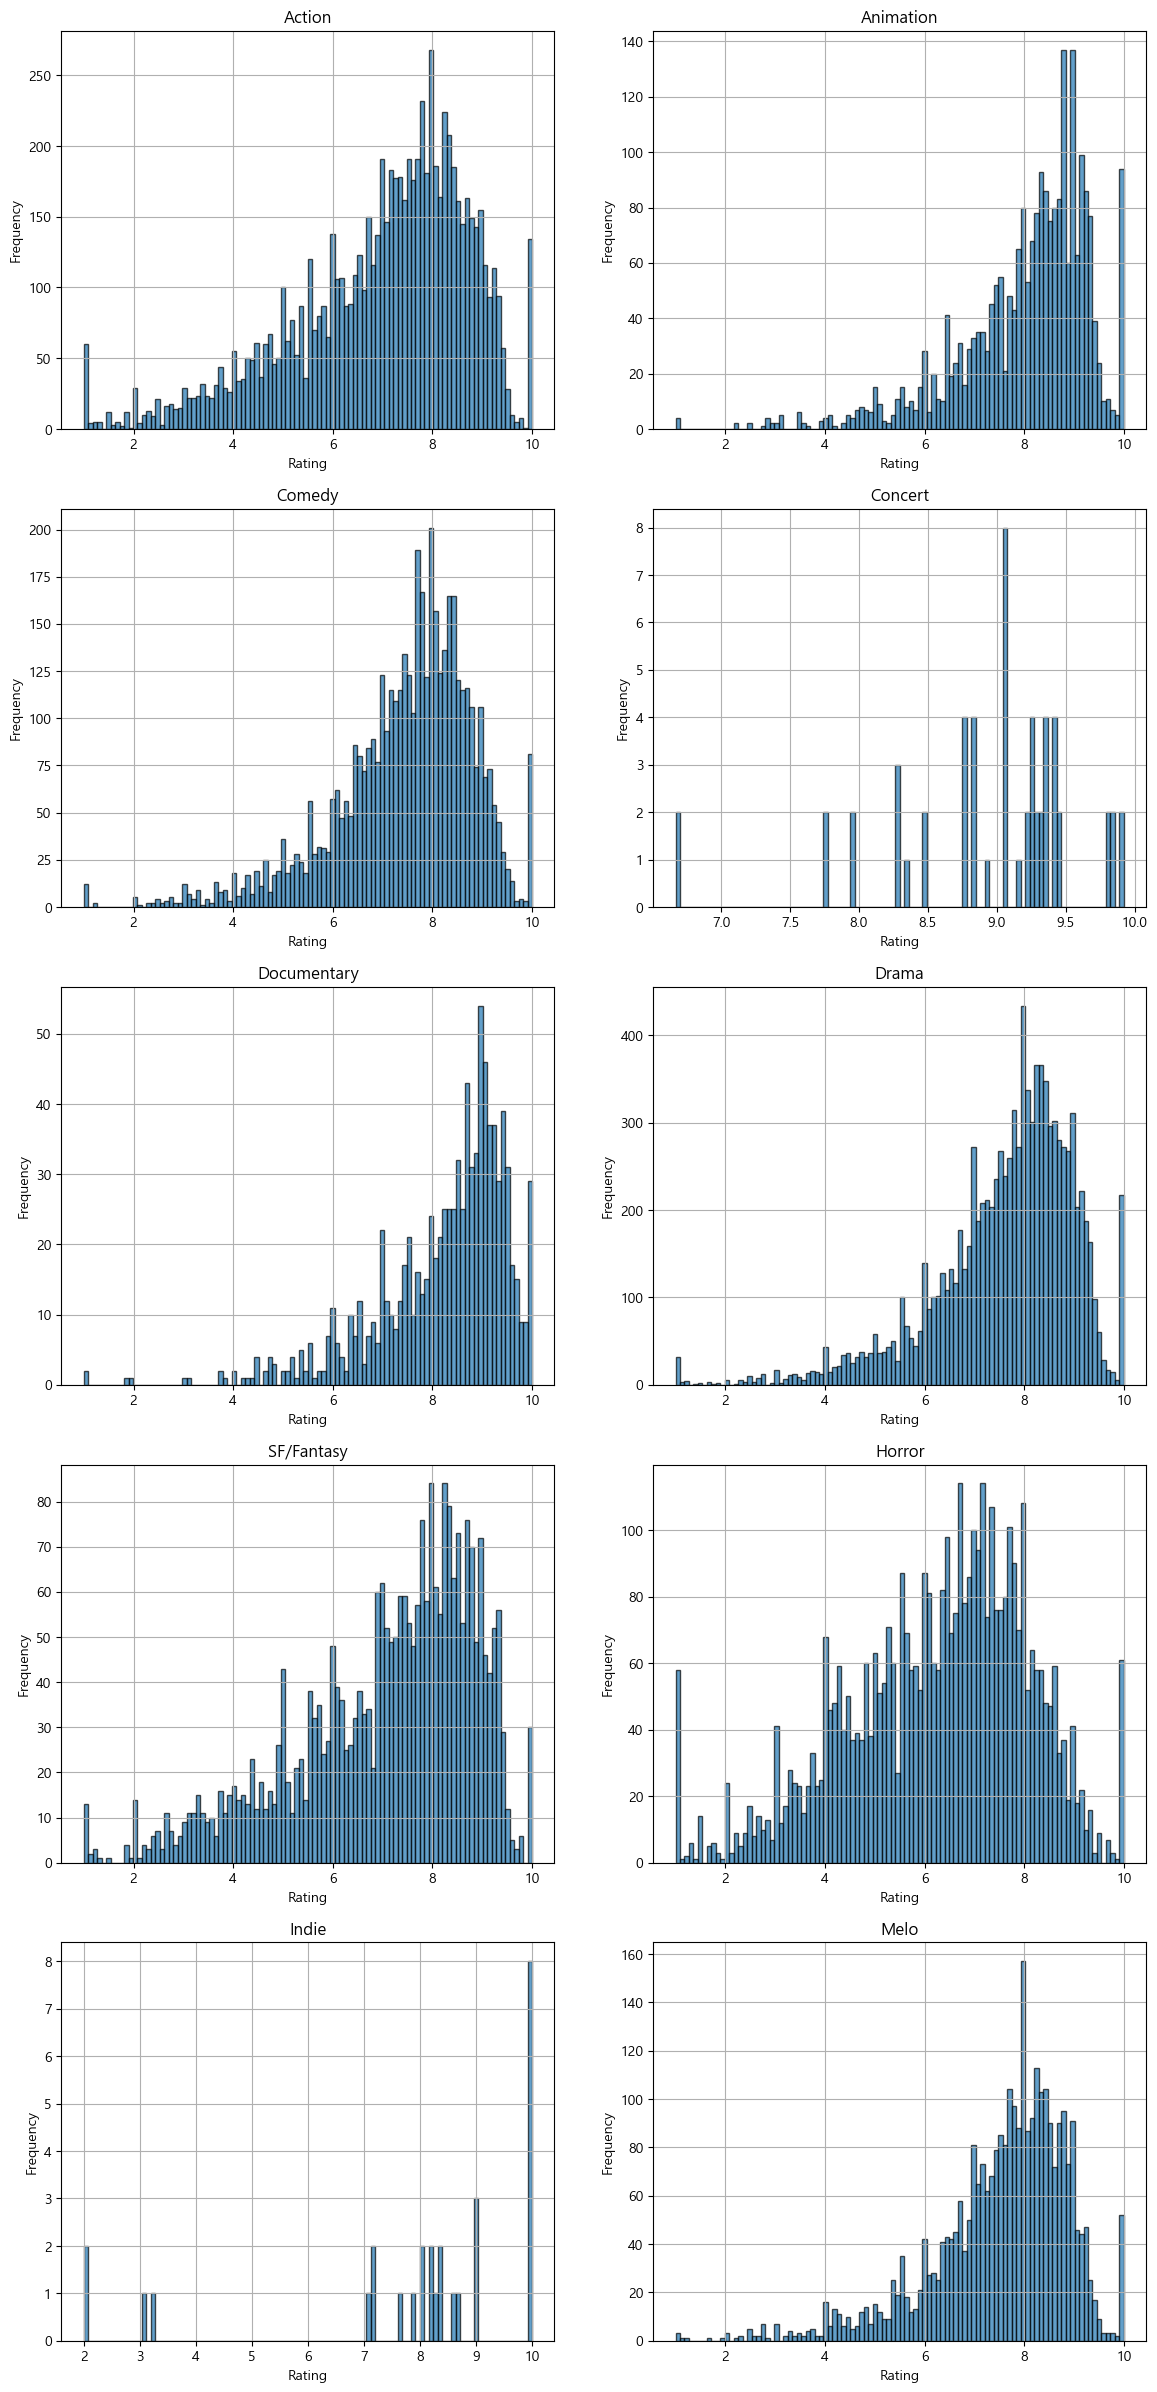

In [38]:
# histogram, 0 인 경우 평점 등록이 되지 않은 경우, 따라서 제외.
plt.figure(figsize=(14, 30))

plt.subplot(5, 2, 1)
plt.hist(action[action['rating'] > 0]['rating'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Action')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 2)
plt.hist(animation[animation['rating'] > 0]['rating'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Animation')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 3)
plt.hist(comedy[comedy['rating'] > 0]['rating'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Comedy')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 4)
plt.hist(concert[concert['rating'] > 0]['rating'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Concert')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 5)
plt.hist(DQ[DQ['rating'] > 0]['rating'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Documentary')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 6)
plt.hist(drama[drama['rating'] > 0]['rating'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Drama')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 7)
plt.hist(fantasy[fantasy['rating'] > 0]['rating'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('SF/Fantasy')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 8)
plt.hist(horror[horror['rating'] > 0]['rating'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Horror')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 9)
plt.hist(indie[indie['rating'] > 0]['rating'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Indie')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(5, 2, 10)
plt.hist(melo[melo['rating'] > 0]['rating'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Melo')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

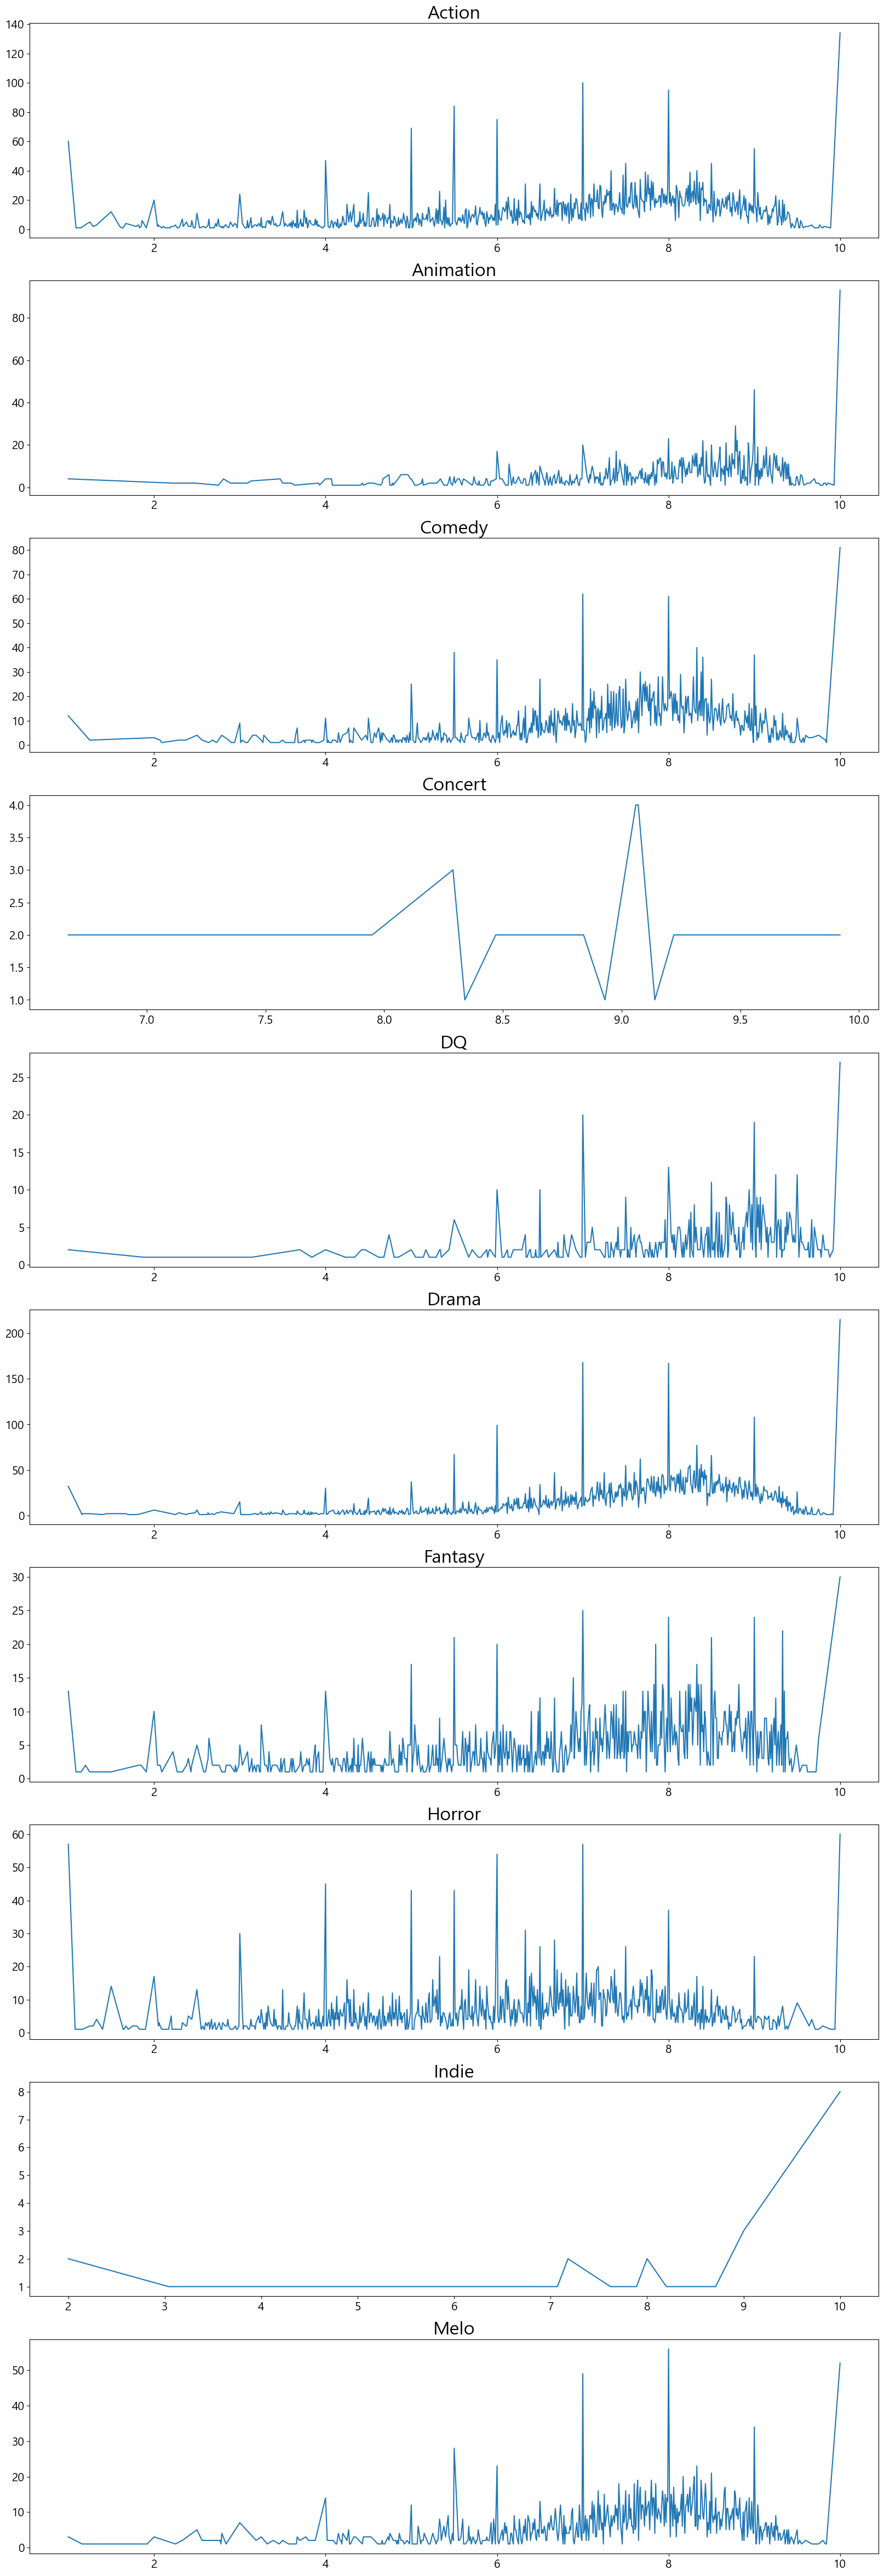

In [42]:
plt.figure(figsize=(20, 60))
plt.rc('font', size=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.subplot(10, 1, 1)
plt.plot(sorted(action[action['rating'] > 0]['rating'].unique()), 
         action[action['rating'] > 0]['rating'].sort_values().value_counts(sort=False))
plt.title('Action')

plt.subplot(10, 1, 2)
plt.plot(sorted(animation[animation['rating'] > 0]['rating'].unique()), 
         animation[animation['rating'] > 0]['rating'].sort_values().value_counts(sort=False))
plt.title('Animation')

plt.subplot(10, 1, 3)
plt.plot(sorted(comedy[comedy['rating'] > 0]['rating'].unique()), 
         comedy[comedy['rating'] > 0]['rating'].sort_values().value_counts(sort=False))
plt.title('Comedy')

plt.subplot(10, 1, 4)
plt.plot(sorted(concert[concert['rating'] > 0]['rating'].unique()), 
         concert[concert['rating'] > 0]['rating'].sort_values().value_counts(sort=False))
plt.title('Concert')

plt.subplot(10, 1, 5)
plt.plot(sorted(DQ[DQ['rating'] > 0]['rating'].unique()), 
         DQ[DQ['rating'] > 0]['rating'].sort_values().value_counts(sort=False))
plt.title('DQ')

plt.subplot(10, 1, 6)
plt.plot(sorted(drama[drama['rating'] > 0]['rating'].unique()), 
         drama[drama['rating'] > 0]['rating'].sort_values().value_counts(sort=False))
plt.title('Drama')

plt.subplot(10, 1, 7)
plt.plot(sorted(fantasy[fantasy['rating'] > 0]['rating'].unique()), 
         fantasy[fantasy['rating'] > 0]['rating'].sort_values().value_counts(sort=False))
plt.title('Fantasy')

plt.subplot(10, 1, 8)
plt.plot(sorted(horror[horror['rating'] > 0]['rating'].unique()), 
         horror[horror['rating'] > 0]['rating'].sort_values().value_counts(sort=False))
plt.title('Horror')

plt.subplot(10, 1, 9)
plt.plot(sorted(indie[indie['rating'] > 0]['rating'].unique()), 
         indie[indie['rating'] > 0]['rating'].sort_values().value_counts(sort=False))
plt.title('Indie')

plt.subplot(10, 1, 10)
plt.plot(sorted(melo[melo['rating'] > 0]['rating'].unique()), 
         melo[melo['rating'] > 0]['rating'].sort_values().value_counts(sort=False))
plt.title('Melo')

plt.show()
# 대게는 6 ~ 10 사이의 평점인 경우가 많다.
# Horror 와 SF/Fantasy, Action에서 6 이하의 평점도 많이 나오며, 특히 horror의 경우 그 분포가 크며, 1 or 10의 
# 극값에 많은 분포를 보여줌을 알 수 있다.
# 또한 콘서트의 경우 그 수가 적지만, 6 이하의 평점이 없으며, 비교적 다른 장르에 비해 높은 평점으로 이루어져 있음.

In [43]:
cols = df.columns
genre_cols = cols[14:]
genre_cols

Index(['is_action', 'is_comedy', 'is_drama', 'is_melo', 'is_horror',
       'is_fantasy', 'is_animation', 'is_DQ', 'is_indie', 'is_concert'],
      dtype='object')

is_action 6.974920219396659
is_comedy 7.439168077900086
is_drama 7.613493437044239
is_melo 7.5260820413436695
is_horror 6.249492669304166
is_fantasy 7.048593917710197
is_animation 8.024824597606274
is_DQ 8.21792194092827
is_indie 7.896551724137929
is_concert 8.956428571428573


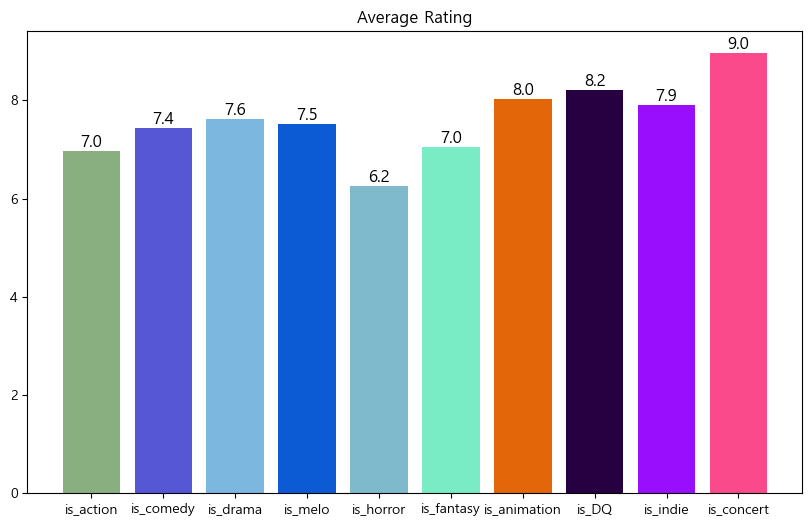

In [49]:
mean_rate_genre = []
plt.rc('font', size=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
for genre in genre_cols:
    mean_rate = df[(df[genre] == 1) & (df['rating'] > 0)]['rating'].mean()
    mean_rate_genre.append(mean_rate)
    print(genre, mean_rate)

colors = np.random.rand(len(genre_cols), 3)

plt.figure(figsize=(10, 6))
bar = plt.bar(genre_cols, mean_rate_genre, color=colors)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.title('Average Rating')
plt.show()
# 앞선 결과와 유사하게 horror가 가장 낮고, 액션, SF/판타지 순으로 낮다.
# 콘서트의 경우 가장 높게 나타난다.

## 3. plus alpha : 평점의 산포도가 큰 경우, 좋아요 및 코멘트 수와도 연관이 있다.

In [46]:
cols = df.columns
genre_cols = cols[14:]
genre_cols

Index(['is_action', 'is_comedy', 'is_drama', 'is_melo', 'is_horror',
       'is_fantasy', 'is_animation', 'is_DQ', 'is_indie', 'is_concert'],
      dtype='object')

is_action 29.008051082731814
is_comedy 29.40634993147556
is_drama 38.216811942691116
is_melo 49.461412688031395
is_horror 19.871424679923727
is_fantasy 42.35089728904162
is_animation 36.24929292929293
is_DQ 33.23991935483871
is_indie 6.928571428571429
is_concert 102.13461538461539


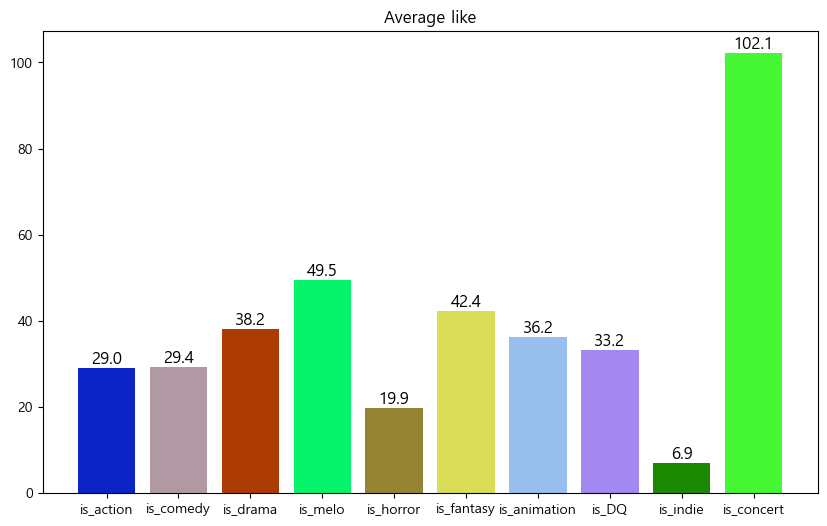

In [50]:
mean_like_genre = []
for genre in genre_cols:
    mean_like = df[(df[genre] == 1) & (df['like'] > 0)]['like'].mean()
    mean_like_genre.append(mean_like)
    print(genre, mean_like)

colors = np.random.rand(len(genre_cols), 3)

plt.figure(figsize=(10, 6))
bar = plt.bar(genre_cols, mean_like_genre, color=colors)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.title('Average like')
plt.show()
# Concert 의 경우 가장 높은 좋아요 수를 기록, 앞서 평점에서 나온 결과와 이어짐을 알 수 있다.
# horror의 경우 예상대로 낮게 나왔으며, 오히려 독립 영화에서 좋아요 수가 낮게 나옴을 알 수 있다. 하지만 독립영화의
# 경우 표본 수와 관심의 정도가 낮아 이런 결과가 나왔다고 짐작해볼 수 있다.

is_action 8.471121862715451
is_comedy 6.272062663185379
is_drama 7.181187889993067
is_melo 7.791420118343195
is_horror 5.8352941176470585
is_fantasy 9.705420827389444
is_animation 7.1752178121974834
is_DQ 7.91747572815534
is_indie 2.2222222222222223
is_concert 13.0


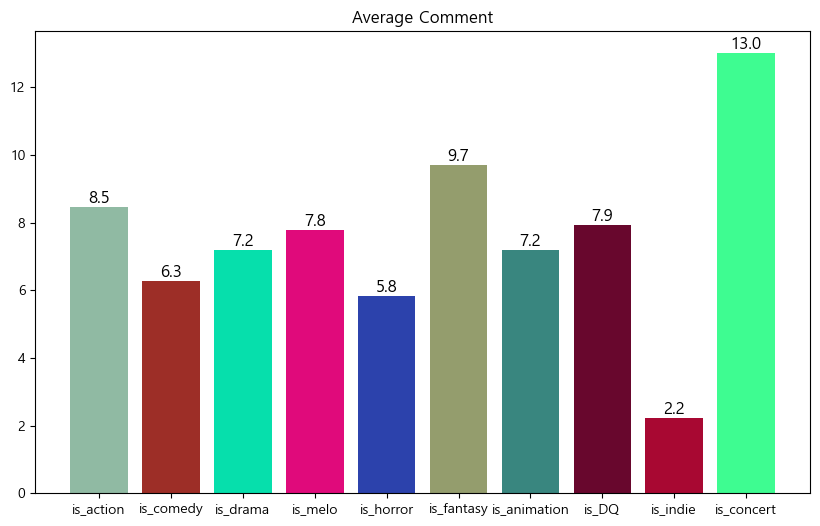

In [51]:
mean_comment_genre = []
for genre in genre_cols:
    mean_comment = df[(df[genre] == 1) & (df['comment'] > 0)]['comment'].mean()
    mean_comment_genre.append(mean_comment)
    print(genre, mean_comment)

colors = np.random.rand(len(genre_cols), 3)

plt.figure(figsize=(10, 6))
bar = plt.bar(genre_cols, mean_comment_genre, color=colors)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.title('Average Comment')
plt.show()
# Concert는 역시 코멘트 수도 높게 나타난다.
# 표본 수가 적은 독립영화를 제외하곤 horror는 코멘트 수도 낮게 나옴을 알 수 있다.

# 3. 고전 영화일수록 가격이 낮거나 무료로 제공되며, 대여 기간이 길 것이다.

## 1. 고전 영화의 기준

### 1) 연도의 분포를 통해 나눠보기

In [52]:
# 0은 수집이 되지 않은 경우, 1946이 가장 오래된 영화
sorted(df['year'].unique())

[0,
 1946,
 1948,
 1949,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

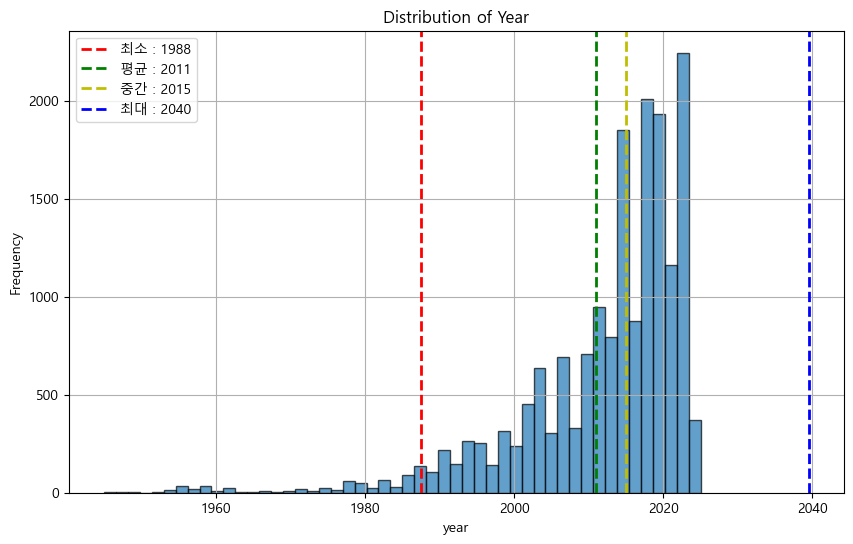

In [72]:
plt.figure(figsize=(10, 6))
Q1 = df[df['year'] > 0]['year'].quantile(0.25)
Q3 = df[df['year'] > 0]['year'].quantile(0.75)
IQR = Q3 - Q1
min_value = Q1 - IQR*1.5
max_value = Q3 + IQR*1.5
middle_value = df[df['year'] > 0]['year'].quantile(0.5)
mean_value = int(df[df['year'] > 0]['year'].mean())

plt.hist(df['year'].dropna(), bins=50, range=(1945, 2025), edgecolor='k', alpha=0.7)
plt.title('Distribution of Year')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.axvline(x=min_value, color='r', linestyle='--', linewidth=2)
plt.axvline(x=mean_value, color='g', linestyle='--', linewidth=2)
plt.axvline(x=middle_value, color='y', linestyle='--', linewidth=2)
plt.axvline(x=max_value, color='b', linestyle='--', linewidth=2)
plt.grid(True)
plt.legend(('최소 : 1988', '평균 : 2011', '중간 : 2015', '최대 : 2040'))
plt.show()
# 2000년대에 몰려있음을 알 수 있다.

### 2) 주관적인 범위를 설정하자.
#### CG 기술이 사용되기 시작한, 즉 기술적인 요소가 결합되기 시작한 연도를 기준으로 나누는 것은 어떨까
#### 이러한 기준이라면https://ko.wikipedia.org/wiki/%EC%BB%B4%ED%93%A8%ED%84%B0_%EA%B7%B8%EB%9E%98%ED%94%BD%EC%8A%A4
#### 해당 링크의 내용처럼 CG는 1982년, 즉 1980년대부터 도입되었음을 알 수 있음.
#### 따라서 1980년대 기준으로 나누기로 함.

## 2. 연도 기준으로 고전 및 현대 영화 나누기

In [73]:
classic_movie = df[(df['year'] > 0) & (df['year'] < 1990)]
modern_movie = df[df['year'] >= 1990]

In [74]:
print(len(classic_movie))
print(len(modern_movie))

815
16871


## 3. 두 영화 분류의 가격 분포

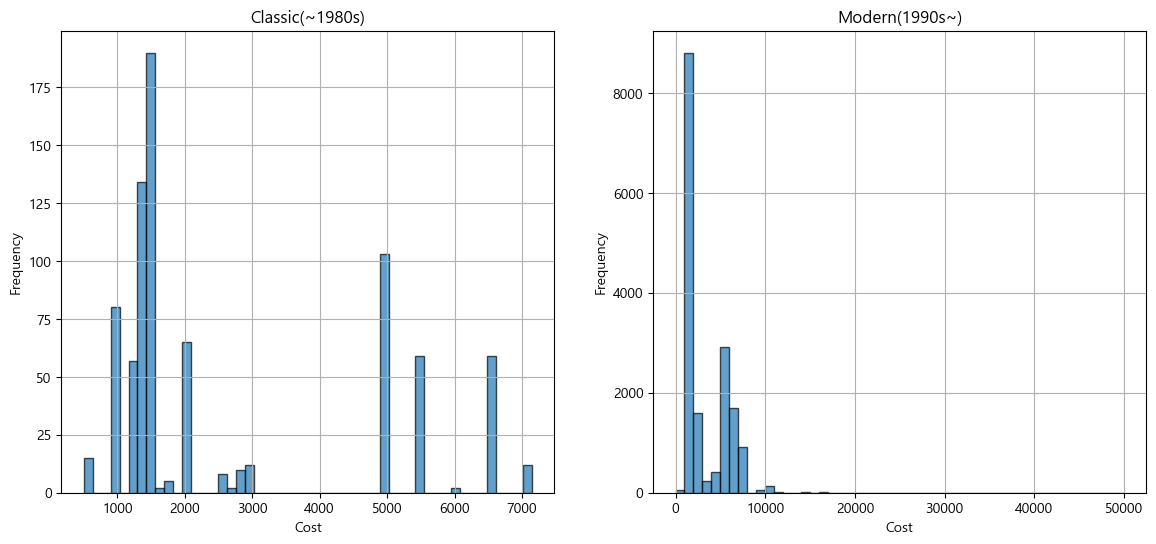

In [78]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(classic_movie['cost'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Classic(~1980s)')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(modern_movie['cost'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Modern(1990s~)')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()
# 현대 영화 일수록 몇몇 10000을 넘는 가격대가 있음을 알 수 있다.

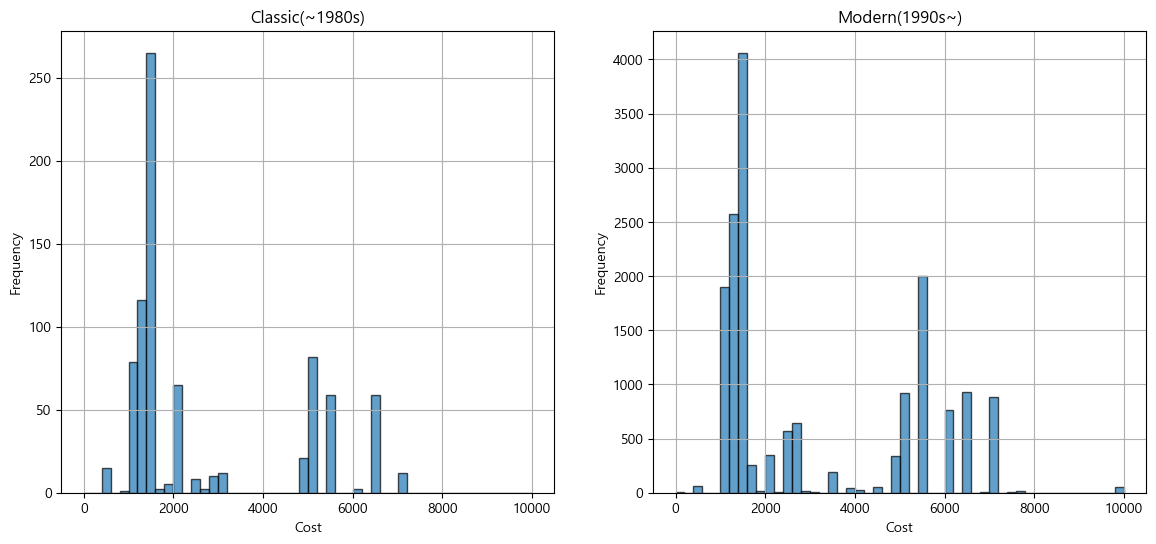

In [79]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(classic_movie['cost'].dropna(), bins=50, range=(0, 10000), edgecolor='k', alpha=0.7)
plt.title('Classic(~1980s)')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(modern_movie['cost'].dropna(), bins=50, range=(0, 10000), edgecolor='k', alpha=0.7)
plt.title('Modern(1990s~)')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()
# 최대 10000으로 제한 시, 비교적 조금 더 높은 가격대의 영화가 있음을 알 수 있다.

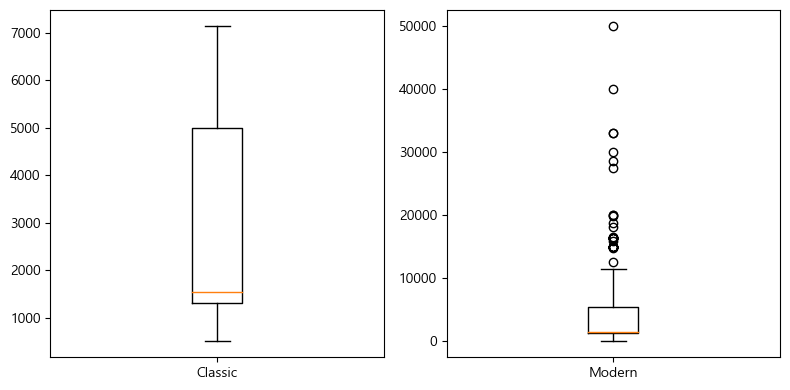

Classic 가격 평균 : 2673원
Modern 가격 평균 : 3197원


In [82]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(classic_movie['cost'].dropna(), labels=['Classic'])

plt.subplot(1, 2, 2)
plt.boxplot(modern_movie['cost'].dropna(), labels=['Modern'])

plt.tight_layout()
plt.show()

classic_mean = classic_movie['cost'].mean()
modern_mean = modern_movie['cost'].mean()

print(f'Classic 가격 평균 : {int(classic_mean)}원')
print(f'Modern 가격 평균 : {int(modern_mean)}원')

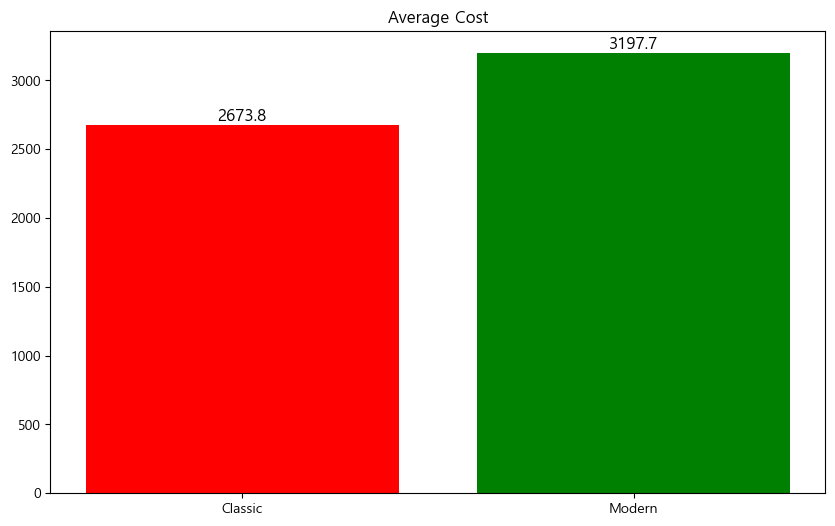

In [91]:
plt.figure(figsize=(10, 6))

bar = plt.bar(['Classic', 'Modern'], [classic_mean, modern_mean], color=['red', 'green'])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.title('Average Cost')
plt.show()

In [80]:
# 이번엔 무료 영화들 중 고전 영화의 비율을 살펴보자.
sorted(df[df['type'] == '무료']['year'].unique())
# 오히려 무료 영화들은 전부 현대 영화임을 알 수 있다.

[0, 2011, 2014, 2016]

## 4. 두 영화 분류의 대여 기간 분포

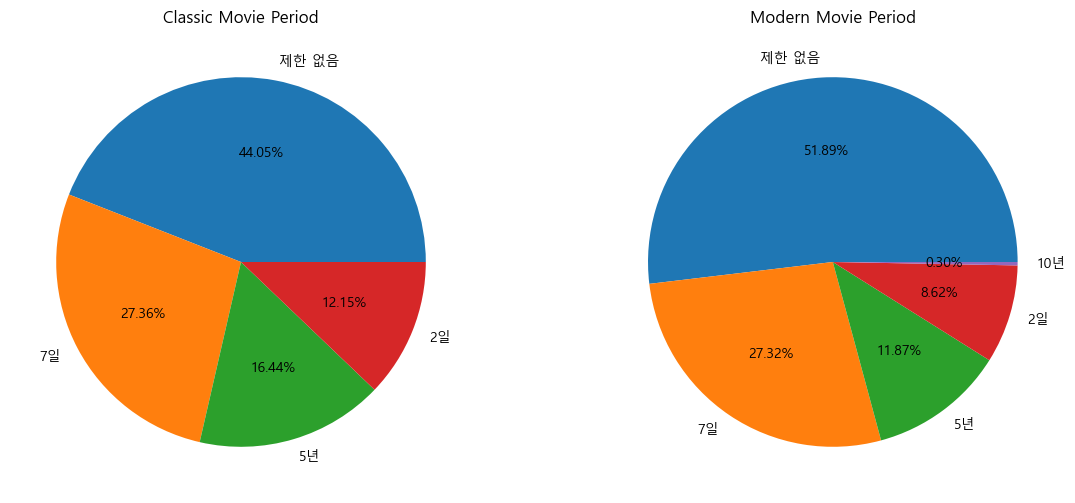

In [92]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
classic_counts = classic_movie['period'].value_counts()
plt.pie(classic_counts, labels=classic_counts.index, autopct='%.2f%%')
plt.title('Classic Movie Period')

plt.subplot(1, 2, 2)
modern_counts = modern_movie['period'].value_counts()
plt.pie(modern_counts, labels=modern_counts.index, autopct='%.2f%%')
plt.title('Modern Movie Period')

plt.show()
# 5년인 경우가 고전 영화에서 약 5% 더 많은 비율을 보여주긴하나, 
# 비교적 짧은 2일의 경우가 더 많고, 제한 없음이 더 적으며 고전 영화에서는 10년의 이용기간은 나타나지 않으므로
# 기간적 차이가 있다고 보기엔 어렵다.

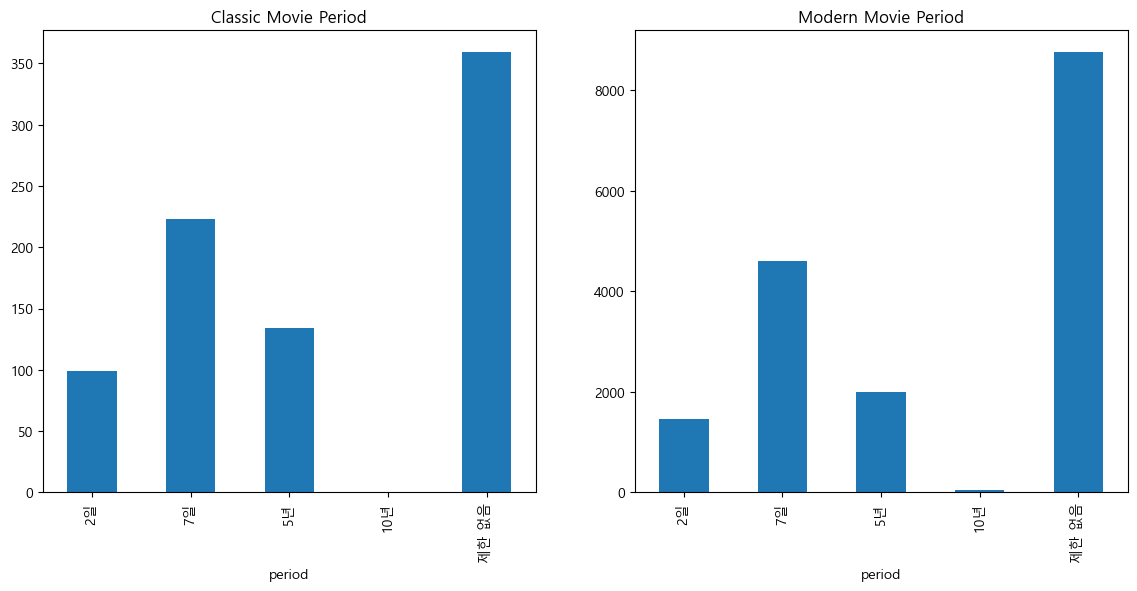

In [97]:
periods = ['2일', '7일', '5년', '10년', '제한 없음']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
classic_movie['period'].value_counts().reindex(periods).plot(kind='bar')
plt.title('Classic Movie Period')

plt.subplot(1, 2, 2)
modern_movie['period'].value_counts().reindex(periods).plot(kind='bar')
plt.title('Modern Movie Period')

plt.show()

## 5. 결론 : 고전 영화의 경우 현대 영화에 비해 가격이 전체적으로 낮으나, 무료인 경우는 없고, 기간의 경우 분포에 있어 약간의 차이를 보이지만 두 분류에 대해 유의미한 차이가 있다고 보여지지는 않는다.

# 4. 코미디 or 호러 장르의 경우 상영 시간 비교적 다른 영화에 짧을 것이다. (공포 or 웃음이 길어질수록 무뎌질 가능성이 있다.)

## 1. 분석

In [98]:
cols = df.columns
genre_cols = cols[14:]

is_action : 102
is_comedy : 98
is_drama : 100
is_melo : 103
is_horror : 96
is_fantasy : 100
is_animation : 80
is_DQ : 89
is_indie : 58
is_concert : 113


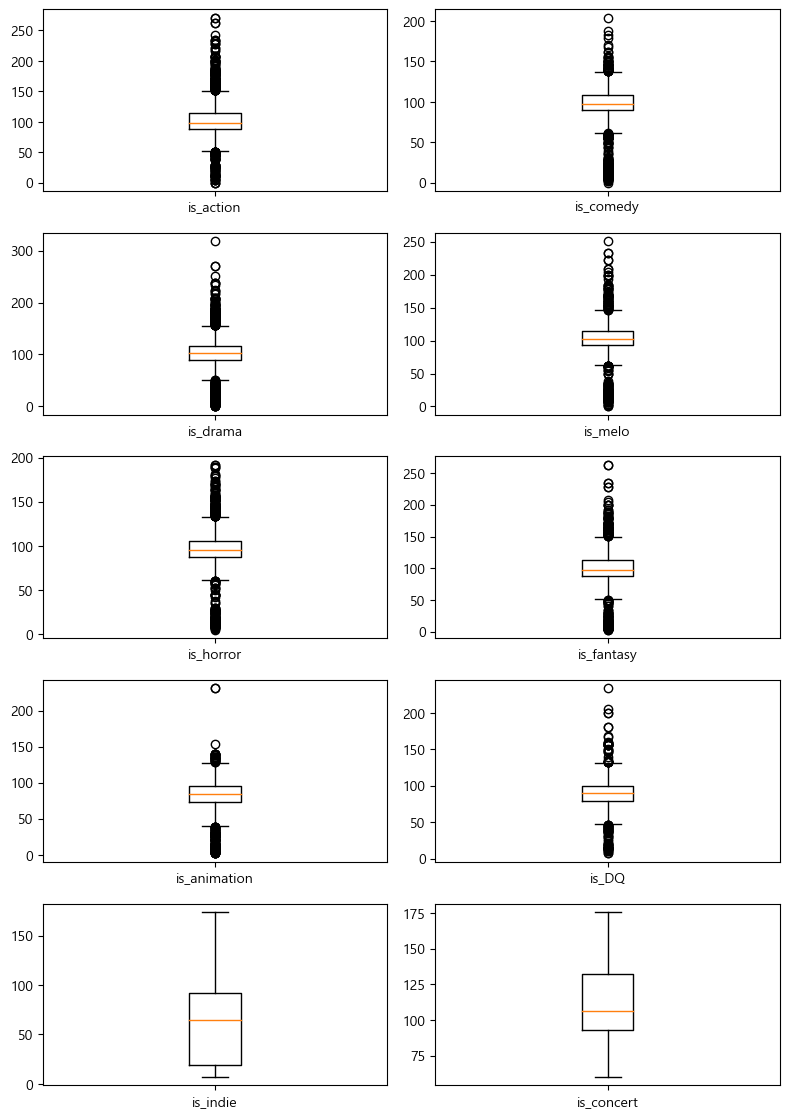

In [99]:
plt.figure(figsize=(8, 20))

np.random.seed(seed)
for idx, genre in enumerate(genre_cols) :

    plt.subplot(9, 2, idx+1)
    plt.boxplot(df[df[genre] == 1]['runtime'].dropna(), labels=[genre])
    mean_time = int(df[df[genre] == 1]['runtime'].mean())
    print(f'{genre} : {mean_time}')

plt.tight_layout()
plt.show()
# 전체적으로 아웃라이어가 상당히 많다.

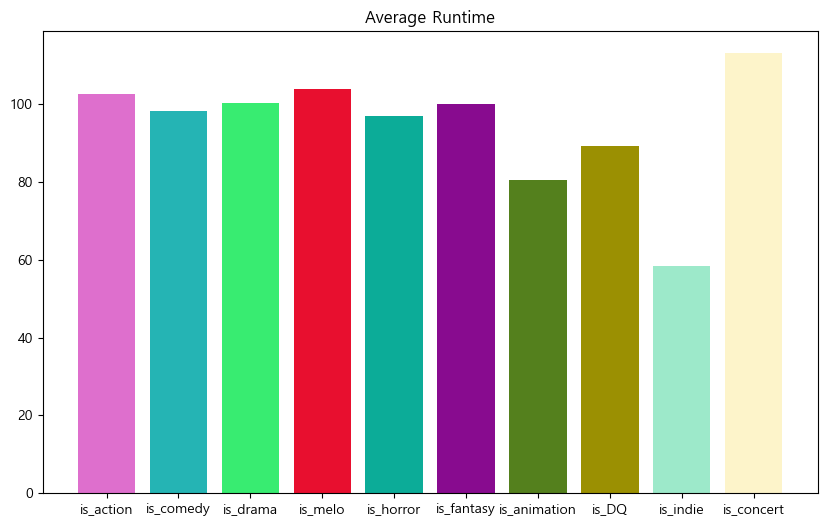

In [101]:
mean_runtime_genre = []
for genre in genre_cols:
    mean_runtime = df[df[genre] == 1]['runtime'].mean()
    mean_runtime_genre.append(mean_runtime)

colors = np.random.rand(len(genre_cols), 3)

plt.figure(figsize=(10, 6))
plt.bar(genre_cols, mean_runtime_genre, color=colors)
plt.title('Average Runtime')
plt.show()
# 오히려 애니메이션, 다큐멘터리, 독립영화가 짧다. 하지만 전체적으로 아웃라이어 값이 많다.

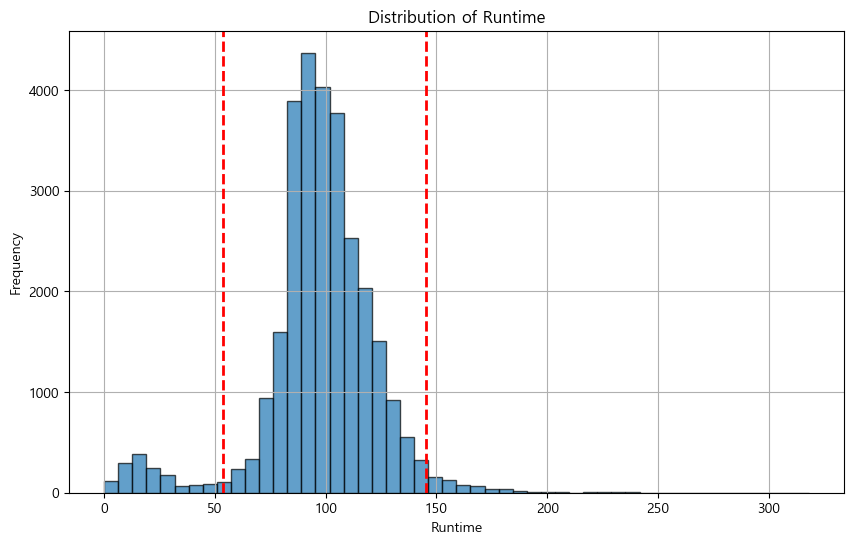

In [102]:
plt.figure(figsize=(10, 6))
Q1 = df['runtime'].quantile(0.25)
Q3 = df['runtime'].quantile(0.75)
IQR = Q3 - Q1
min_value = Q1 - IQR*1.5
max_value = Q3 + IQR*1.5

plt.hist(df['runtime'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.axvline(x=min_value, color='r', linestyle='--', linewidth=2)
plt.axvline(x=max_value, color='r', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()

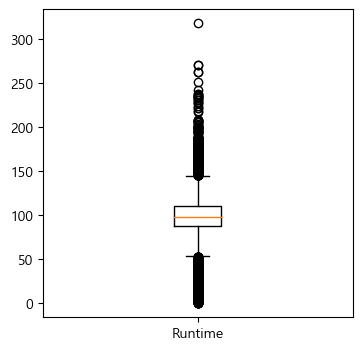

In [103]:
plt.figure(figsize=(4, 4))

plt.boxplot(df['runtime'].dropna(), labels=['Runtime'])

plt.show()

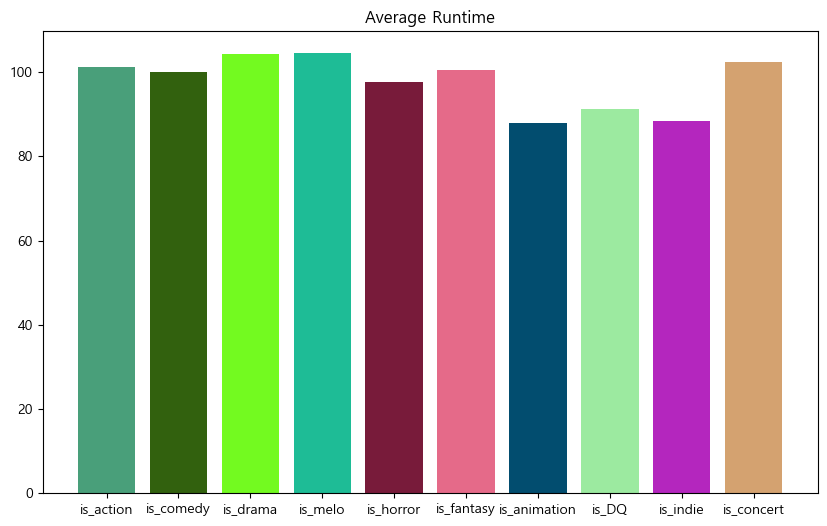

In [104]:
del_out_runtime = df[(df['runtime'] <= max_value) & (df['runtime'] >= min_value)]

mean_runtime_genre = []
for genre in genre_cols:
    mean_runtime = del_out_runtime[del_out_runtime[genre] == 1]['runtime'].mean()
    mean_runtime_genre.append(mean_runtime)

colors = np.random.rand(len(genre_cols), 3)

plt.figure(figsize=(10, 6))
plt.bar(genre_cols, mean_runtime_genre, color=colors)
plt.title('Average Runtime')
plt.show()
# 호러, 코미디가 짧기보단, 애니메이션, 다큐, 독립영화가 짧았으며, 그 차이의 편차도 크지 않다.

## 2. 결론 : 영화 별 상영 시간에 큰 차이는 없으며, 오히려 애니메이션, 다큐멘터리, 독립영화가 비교적 짧다.

# 5. 사람들의 관심(좋아요, 평점, 코멘트 수)가 낮은 영화일수록 무료 or 낮은 가격일 것이다.

## 1. 가격의 분포 살펴보기 및 기준 지정

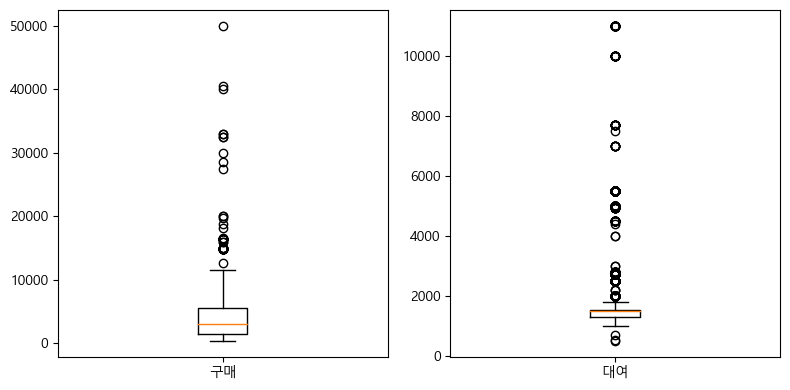

구매 시 가격 평균 : 3660원
대여 시 가격 평균 : 1727원


In [105]:
# 먼저 구매와 대여간 가격 차이가 있으므로, 각 경우에 대한 값의 범위를 시각화
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df[df['type'] == '구매']['cost'].dropna(), labels=['구매'])

plt.subplot(1, 2, 2)
plt.boxplot(df[df['type'] == '대여']['cost'].dropna(), labels=['대여'])

plt.tight_layout()
plt.show()

buy_mean = df[df['type'] == '구매']['cost'].mean()
borrow_mean = df[df['type'] == '대여']['cost'].mean()

print(f'구매 시 가격 평균 : {int(buy_mean)}원')
print(f'대여 시 가격 평균 : {int(borrow_mean)}원')
# 구매의 경우 10000을 넘어갈 때, 대여의 경우 2000을 넘어갈때 아웃라이어로 보임
# 대여의 경우 비교적 평균 가격에 몰려있는 것으로 보아, 아웃라이어를 제외한 가격에 대해 분포의 편차가 크지 않음
# 따라서 구매를 기준으로 진행

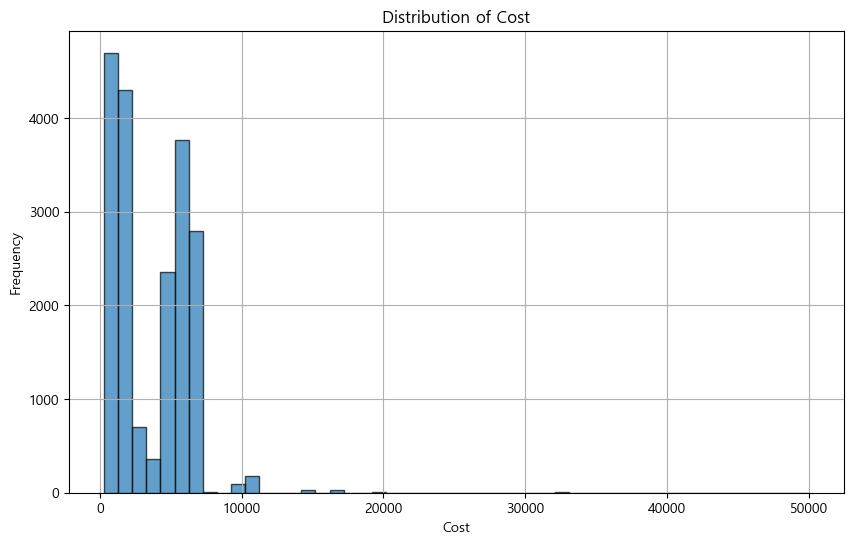

In [106]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['type'] == '구매']['cost'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# 아웃 라이어 값으로 인해 분포가 치우쳐짐

In [108]:
# 전체 중 10000 초과 시 나타나는 아웃라이어의 비율을 확인
whole = len(df[df['type'] == '구매'])
over_10k = len(df[(df['type'] == '구매') & (df['cost'] > 10000)])
print(round(over_10k / whole * 100, 2))
# 약 1.33 %에 해당하는 데이터들이므로 제외하여 분석 진행

1.33


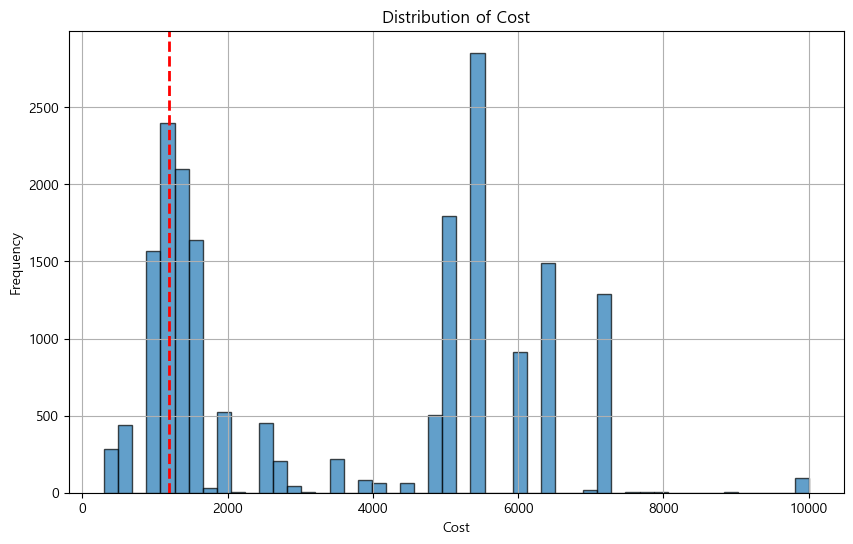

기준 가격 : 1194


In [109]:
under_10k = df[(df['type'] == '구매') & (df['cost'] <= 10000)]
mean_cost = under_10k['cost'].mean()
std_cost = under_10k['cost'].std()
threshold = mean_cost - std_cost

plt.figure(figsize=(10, 6))
plt.hist(under_10k['cost'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()
print(f'기준 가격 : {int(threshold)}')
# 평균 - 표준편차 값을 통해 평균보다 한 표준편차만큼 낮은 값을 얻게되고, 
# 데이터 분포에 있어 비교적 낮은 값임을 알 수 있음.
# 따라서 해당 가격을 올림하여 1200을 기준으로 낮은 가격 범위 지정

In [112]:
whole = df[df['type'] == '구매']
low_cost = whole[whole['cost'] <= 1200]
up_cost = whole[whole['cost'] > 1200]

In [113]:
print(len(low_cost))
print(len(up_cost))

4697
14646


## 2. 두 가격 범위에 대해 평균 좋아요, 평점, 코멘트 수 비교

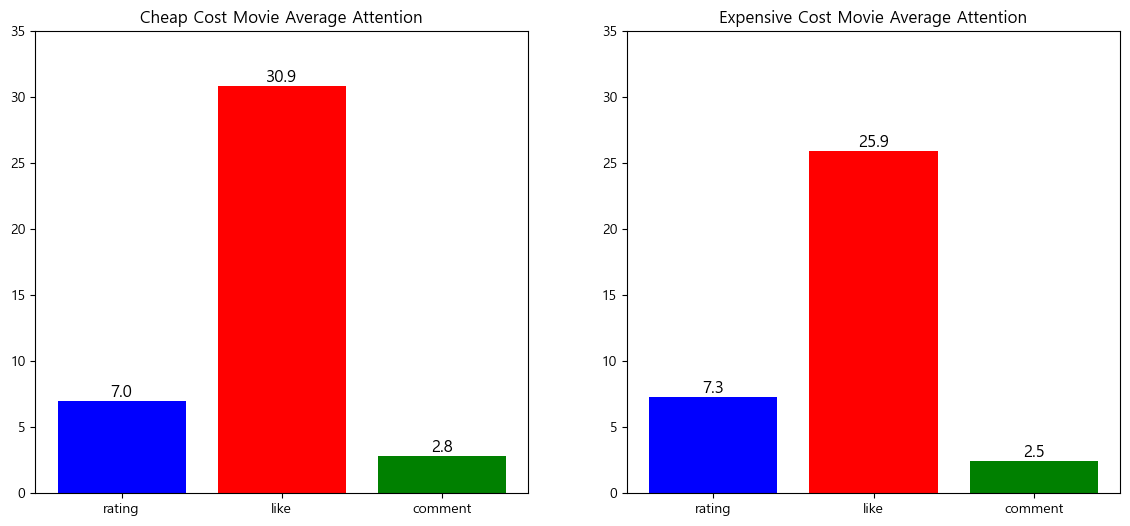

In [122]:
attention_columns = ['rating', 'like', 'comment']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
low_rating = low_cost[low_cost['rating'] != 0]['rating'].mean()
low_like = low_cost['like'].mean()
low_comment = low_cost['comment'].mean()
low_means = [low_rating, low_like, low_comment]
bar1 = plt.bar(attention_columns, low_means, color=['blue', 'red', 'green'])
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.ylim(0, 35)
plt.title('Cheap Cost Movie Average Attention')

plt.subplot(1, 2, 2)
up_rating = up_cost[up_cost['rating'] != 0]['rating'].mean()
up_like = up_cost['like'].mean()
up_comment = up_cost['comment'].mean()
up_means = [up_rating, up_like, up_comment]
bar2 = plt.bar(attention_columns, up_means, color=['blue', 'red', 'green'])
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.ylim(0, 35)
plt.title('Expensive Cost Movie Average Attention')

plt.show()
# 평점이 기준 가격보다 비싼 경우 약간 평점이 더 높음

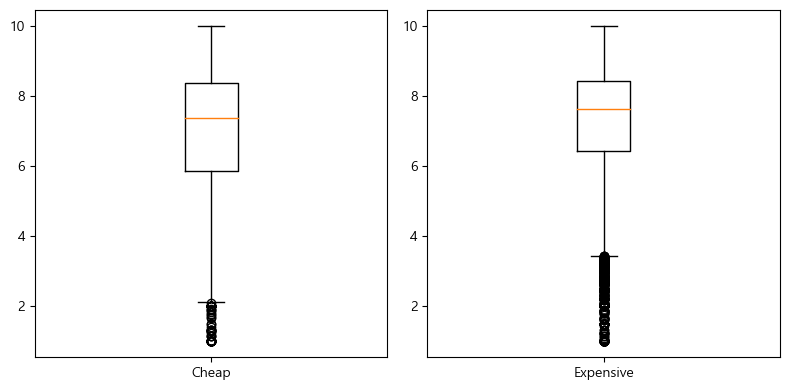

In [117]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(low_cost[low_cost['rating'] != 0]['rating'].dropna(), labels=['Cheap'])

plt.subplot(1, 2, 2)
plt.boxplot(up_cost[up_cost['rating'] != 0]['rating'].dropna(), labels=['Expensive'])

plt.tight_layout()
plt.show()
# 거의 비슷함. 유의미한 차이가 있어보이지 않음.

## 3. 범위 재지정 후 추가적인 시도

### 1) 무료 vs 유료

In [118]:
free_cost = df[df['cost'] == 0]
pay_cost = df[df['cost'] != 0]

In [119]:
# 비교 대상 범위가 적음
print(len(free_cost))
print(len(pay_cost))

30
29155


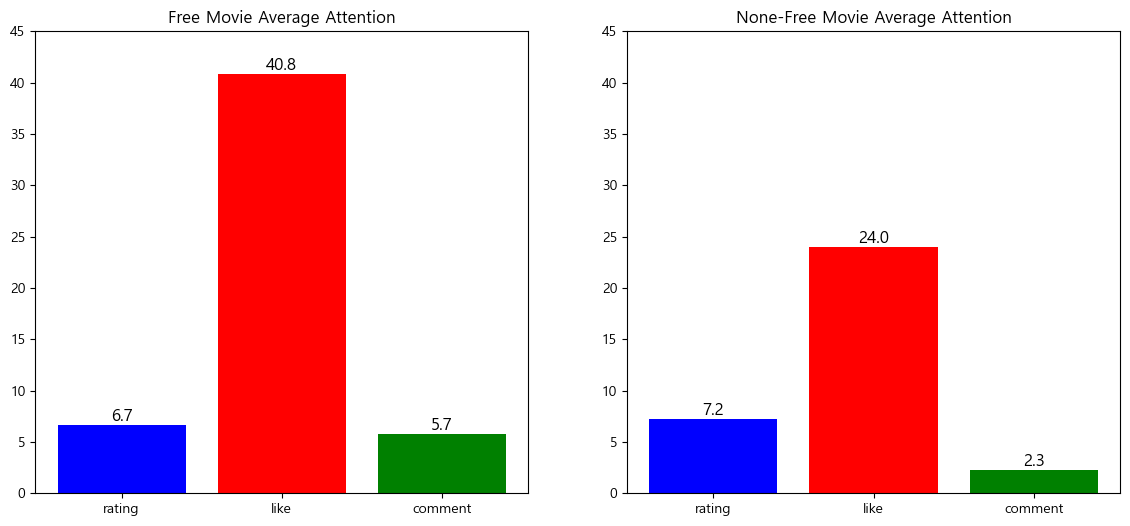

In [124]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
free_rating = free_cost[free_cost['rating'] != 0]['rating'].mean()
free_like = free_cost['like'].mean()
free_comment = free_cost['comment'].mean()
free_means = [free_rating, free_like, free_comment]
bar1 = plt.bar(attention_columns, free_means, color=['blue', 'red', 'green'])
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.ylim(0, 45)
plt.title('Free Movie Average Attention')

plt.subplot(1, 2, 2)
pay_rating = pay_cost[pay_cost['rating'] != 0]['rating'].mean()
pay_like = pay_cost['like'].mean()
pay_comment = pay_cost['comment'].mean()
pay_means = [pay_rating, pay_like, pay_comment]
bar2 = plt.bar(attention_columns, pay_means, color=['blue', 'red', 'green'])
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.ylim(0, 45)
plt.title('None-Free Movie Average Attention')

plt.show()
# Free의 경우 데이터 수가 적긴하지만, 평점이 5 이하로 비교적 낮으며, 코멘트가 더 많이 달려있다.

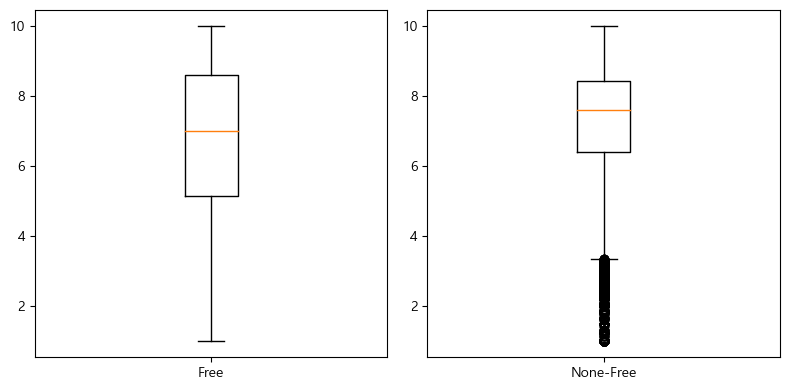

In [125]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(free_cost[free_cost['rating'] != 0]['rating'].dropna(), labels=['Free'])

plt.subplot(1, 2, 2)
plt.boxplot(pay_cost[pay_cost['rating'] != 0]['rating'].dropna(), labels=['None-Free'])

plt.tight_layout()
plt.show()

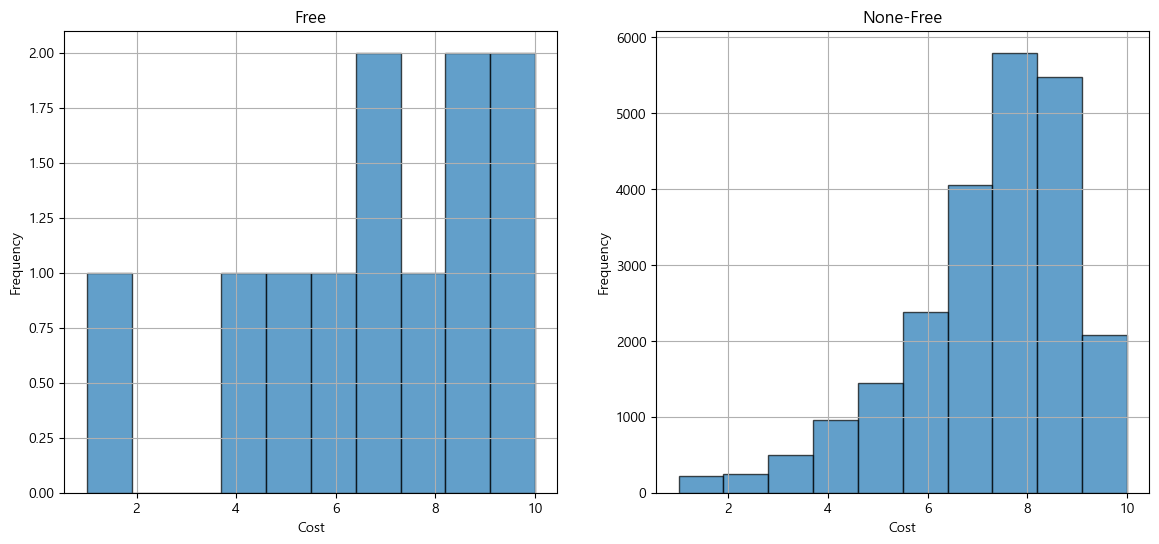

In [126]:
# 평점 0의 경우 미응답이기에 제외 후 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(free_cost[free_cost['rating'] != 0]['rating'].dropna(), bins=10, edgecolor='k', alpha=0.7)
plt.title('Free')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(pay_cost[pay_cost['rating'] != 0]['rating'].dropna(), bins=10, edgecolor='k', alpha=0.7)
plt.title('None-Free')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

### 2) 구매 평균 기준

In [139]:
under_mean_cost = whole[whole['cost'] <= mean_cost]
over_mean_cost = whole[whole['cost'] > mean_cost]

In [140]:
print(len(under_mean_cost))
print(len(over_mean_cost))

9914
9429


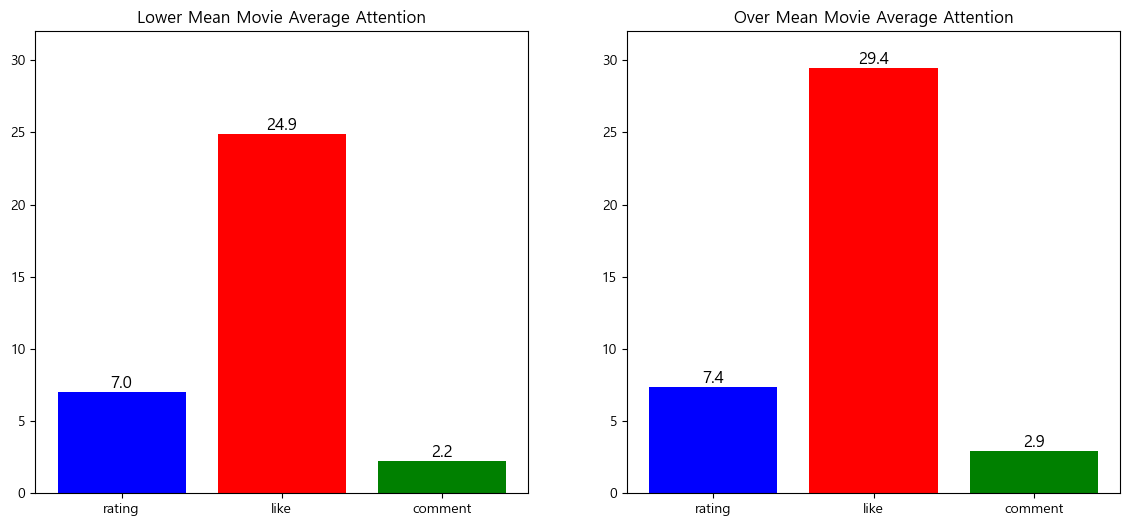

In [141]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
um_rating = under_mean_cost[under_mean_cost['rating'] != 0]['rating'].mean()
um_like = under_mean_cost['like'].mean()
um_comment = under_mean_cost['comment'].mean()
um_means = [um_rating, um_like, um_comment]
bar1 = plt.bar(attention_columns, um_means, color=['blue', 'red', 'green'])
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.ylim(0, 32)
plt.title('Lower Mean Movie Average Attention')

plt.subplot(1, 2, 2)
om_rating = over_mean_cost[over_mean_cost['rating'] != 0]['rating'].mean()
om_like = over_mean_cost['like'].mean()
om_comment = over_mean_cost['comment'].mean()
om_means = [om_rating, om_like, om_comment]
bar2 = plt.bar(attention_columns, om_means, color=['blue', 'red', 'green'])
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.ylim(0, 32)
plt.title('Over Mean Movie Average Attention')

plt.show()

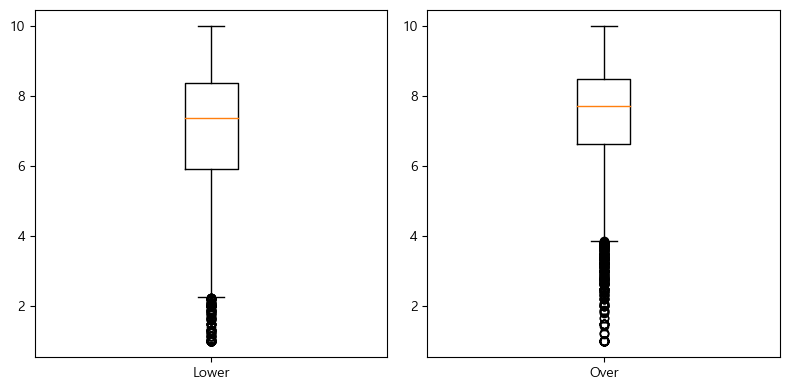

In [142]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(under_mean_cost[under_mean_cost['rating'] != 0]['rating'].dropna(), labels=['Lower'])

plt.subplot(1, 2, 2)
plt.boxplot(over_mean_cost[over_mean_cost['rating'] != 0]['rating'].dropna(), labels=['Over'])

plt.tight_layout()
plt.show()

## 4. 결론 : 가격이 저렴 or 무료인 경우 평점이 아주 약간 낮은 경향이 있으나, 큰 차이가 있진 않다.